In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

In [3]:
df = pd.read_csv('final_cleaned_data.csv')

## Consumer Sentiment
ICS, ICC, ICE

In [11]:
# Consumer Sentiment Indices:
# ICS:INDEX OF CONSUMER SENTIMENT
# ICC:INDEX OF CURRENT ECONOMIC CONDITIONS
# ICE:INDEX OF CONSUMER EXPECTATIONS

df_consumer = df[['YYYYQ','ICS','ICC','ICE','gdp_increase_rate']]
df_consumer = df_consumer.dropna()
df_consumer = df_consumer.reset_index(drop=True)

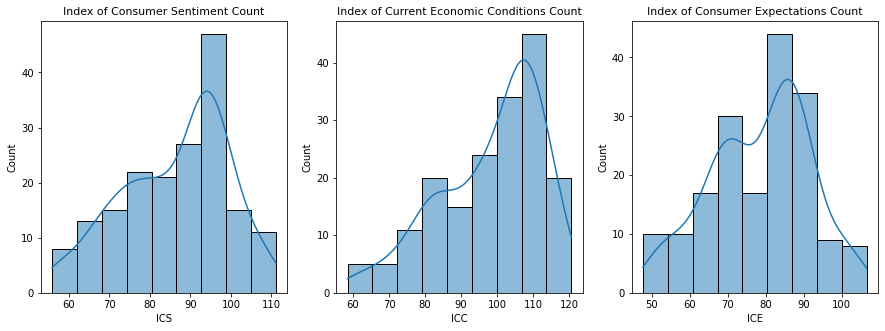

In [12]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.histplot(df_consumer["ICS"], kde=True, ax=axs[0])
sns.histplot(df_consumer["ICC"], kde=True, ax=axs[1])
sns.histplot(df_consumer["ICE"], kde=True, ax=axs[2])

# Plot Headers
fontsize = 11
axs[0].set_title('Index of Consumer Sentiment Count', fontsize=fontsize)
axs[1].set_title('Index of Current Economic Conditions Count', fontsize=fontsize)
axs[2].set_title('Index of Consumer Expectations Count', fontsize=fontsize)
plt.show()

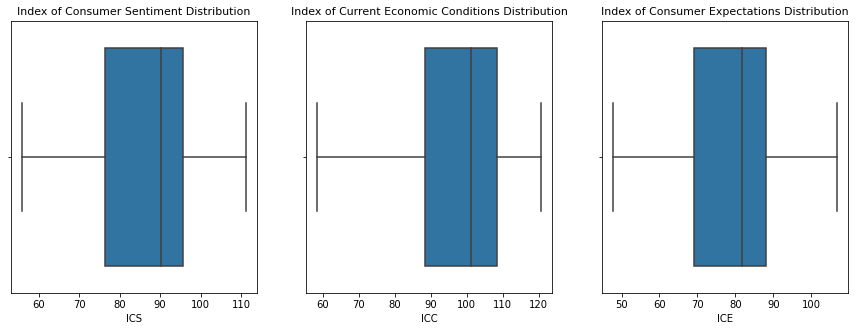

In [13]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.boxplot(x = df_consumer["ICS"], ax=axs[0])
sns.boxplot(x = df_consumer["ICC"], ax=axs[1])
sns.boxplot(x = df_consumer["ICE"], ax=axs[2])

# Plot Headers
fontsize = 11
axs[0].set_title('Index of Consumer Sentiment Distribution', fontsize=fontsize)
axs[1].set_title('Index of Current Economic Conditions Distribution', fontsize=fontsize)
axs[2].set_title('Index of Consumer Expectations Distribution', fontsize=fontsize)
plt.show()

By the histogram plot and box plot of these three indicators of consumer sentiment, there are no obvious outliers and the data is distributed in good shape.

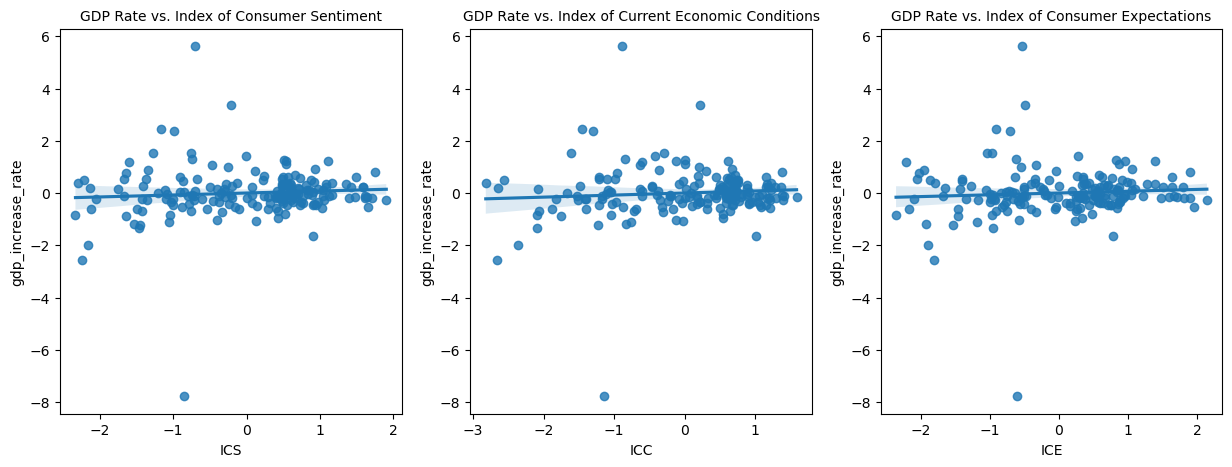

In [6]:
df_consumer_std = df_consumer.copy(deep=True)
df_consumer_std["ICS"] = stats.zscore(df_consumer["ICS"])
df_consumer_std["ICC"] = stats.zscore(df_consumer["ICC"])
df_consumer_std["ICE"] = stats.zscore(df_consumer["ICE"])
df_consumer_std["gdp_increase_rate"] = stats.zscore(df_consumer["gdp_increase_rate"])
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))


sns.regplot(x = df_consumer_std["ICS"], y = df_consumer_std['gdp_increase_rate'], ax=axs[0])
sns.regplot(x = df_consumer_std["ICC"], y = df_consumer_std['gdp_increase_rate'],ax=axs[1])
sns.regplot(x = df_consumer_std["ICE"], y = df_consumer_std['gdp_increase_rate'],ax=axs[2])

# Plot Headers
fontsize = 10
axs[0].set_title('GDP Rate vs. Index of Consumer Sentiment', fontsize=fontsize)
axs[1].set_title('GDP Rate vs. Index of Current Economic Conditions', fontsize=fontsize)
axs[2].set_title('GDP Rate vs. Index of Consumer Expectations', fontsize=fontsize)
plt.show()

No obvious pattern, slightly negative correlated.

## Personal Finances
PAGO, PEXP, RINC

In [7]:
# Personal Finances:
# PAGO:PERSONAL FINANCES B/W YEAR AGO
# PEXP:PERSONAL FINANCES B/W NEXT YEAR
# RINC:REAL FAMILY INCOME NEXT 1-2 YEARS
df_finance = df[['YYYYQ','PAGO','PEXP','RINC','gdp_increase_rate']]
df_finance.info()
df_finance = df_finance.dropna()
df_finance = df_finance.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YYYYQ              181 non-null    int64  
 1   PAGO               181 non-null    float64
 2   PEXP               181 non-null    float64
 3   RINC               181 non-null    float64
 4   gdp_increase_rate  179 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.2 KB


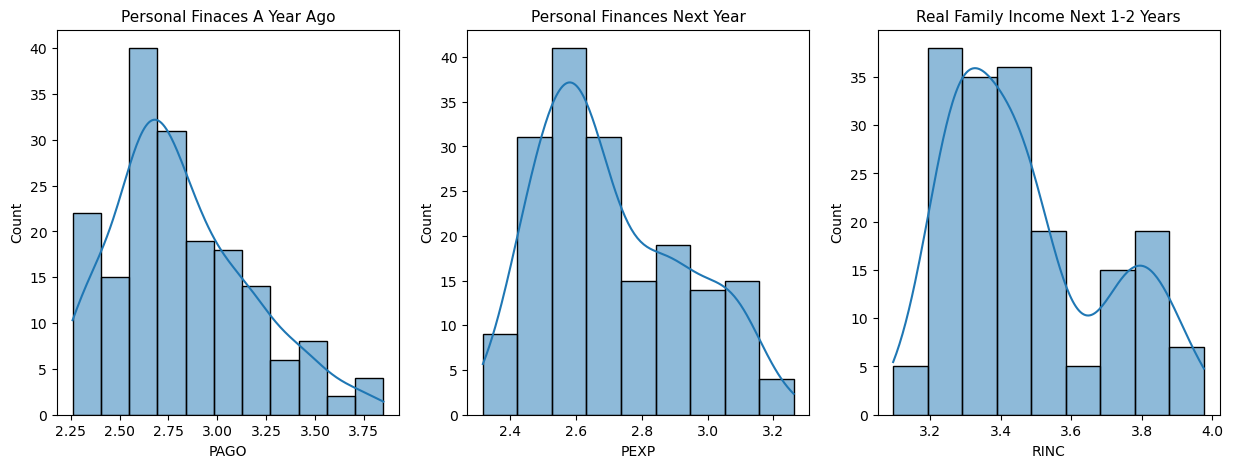

In [8]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.histplot(df_finance["PAGO"], kde=True, ax=axs[0])
sns.histplot(df_finance["PEXP"], kde=True, ax=axs[1])
sns.histplot(df_finance["RINC"], kde=True, ax=axs[2])

# Plot Headers
fontsize=11
axs[0].set_title('Personal Finaces A Year Ago', fontsize=fontsize)
axs[1].set_title('Personal Finances Next Year', fontsize=fontsize)
axs[2].set_title('Real Family Income Next 1-2 Years', fontsize=fontsize)
plt.show()

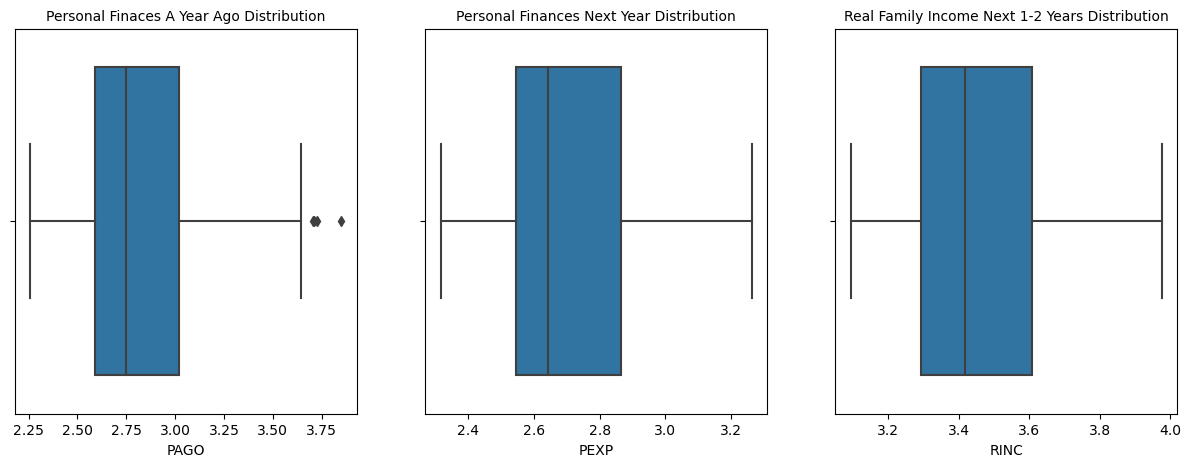

In [9]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.boxplot(x = df_finance["PAGO"], ax=axs[0])
sns.boxplot(x = df_finance["PEXP"], ax=axs[1])
sns.boxplot(x = df_finance["RINC"], ax=axs[2])

# Plot Headers
fontsize=10
axs[0].set_title('Personal Finaces A Year Ago Distribution', fontsize=fontsize)
axs[1].set_title('Personal Finances Next Year Distribution', fontsize=fontsize)
axs[2].set_title('Real Family Income Next 1-2 Years Distribution', fontsize=fontsize)
plt.show()

By the histogram plot and box plot of these three indicators of personal finance, there are not many obvious outliers and the data is distributed in good shape.

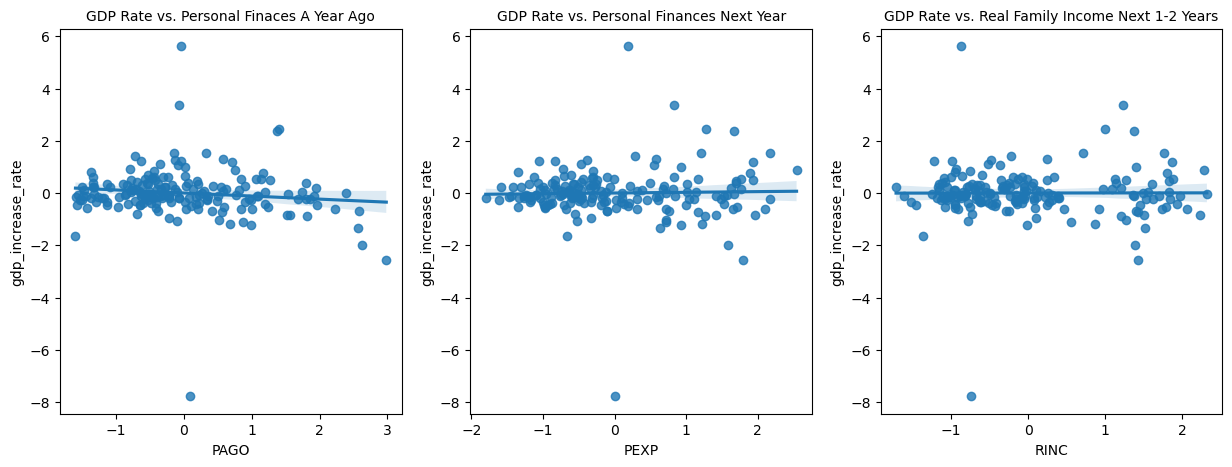

In [10]:
df_finance_std = df_finance.copy(deep=True)
df_finance_std["PAGO"] = stats.zscore(df_finance_std["PAGO"])
df_finance_std["PEXP"] = stats.zscore(df_finance_std["PEXP"])
df_finance_std["RINC"] = stats.zscore(df_finance_std["RINC"])
df_finance_std["gdp_increase_rate"] = stats.zscore(df_finance_std["gdp_increase_rate"])
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.regplot(x = df_finance_std["PAGO"], y = df_finance_std['gdp_increase_rate'], ax=axs[0])
sns.regplot(x = df_finance_std["PEXP"], y = df_finance_std['gdp_increase_rate'],ax=axs[1])
sns.regplot(x = df_finance_std["RINC"], y = df_finance_std['gdp_increase_rate'],ax=axs[2])

# Plot Headers
fontsize=10
axs[0].set_title('GDP Rate vs. Personal Finaces A Year Ago', fontsize=fontsize)
axs[1].set_title('GDP Rate vs. Personal Finances Next Year', fontsize=fontsize)
axs[2].set_title('GDP Rate vs. Real Family Income Next 1-2 Years', fontsize=fontsize)
plt.show()

No clear pattern, less obvious than consumer sentiment.

## Political Affiliation
POLAFF, POLREP, POLDEM, POLCRD

In [16]:
# Political Affiliation:
# POLAFF:POLITICAL AFFILIATION
# POLREP:STRONG OR NOT SO STRONG REPUBLICAN
# POLDEM:STRONG OR NOT SO STRONG DEMOCRAT
# POLCRD:CLOSER TO REPUBLICAN OR DEMOCRAT

df_political = df[['YYYYQ','POLAFF','POLREP','POLDEM','POLCRD','gdp_increase_rate']]
df_political.info()
df_political = df_political.dropna()
df_political = df_political.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YYYYQ              181 non-null    int64  
 1   POLAFF             47 non-null     float64
 2   POLREP             47 non-null     float64
 3   POLDEM             47 non-null     float64
 4   POLCRD             47 non-null     float64
 5   gdp_increase_rate  179 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 8.6 KB


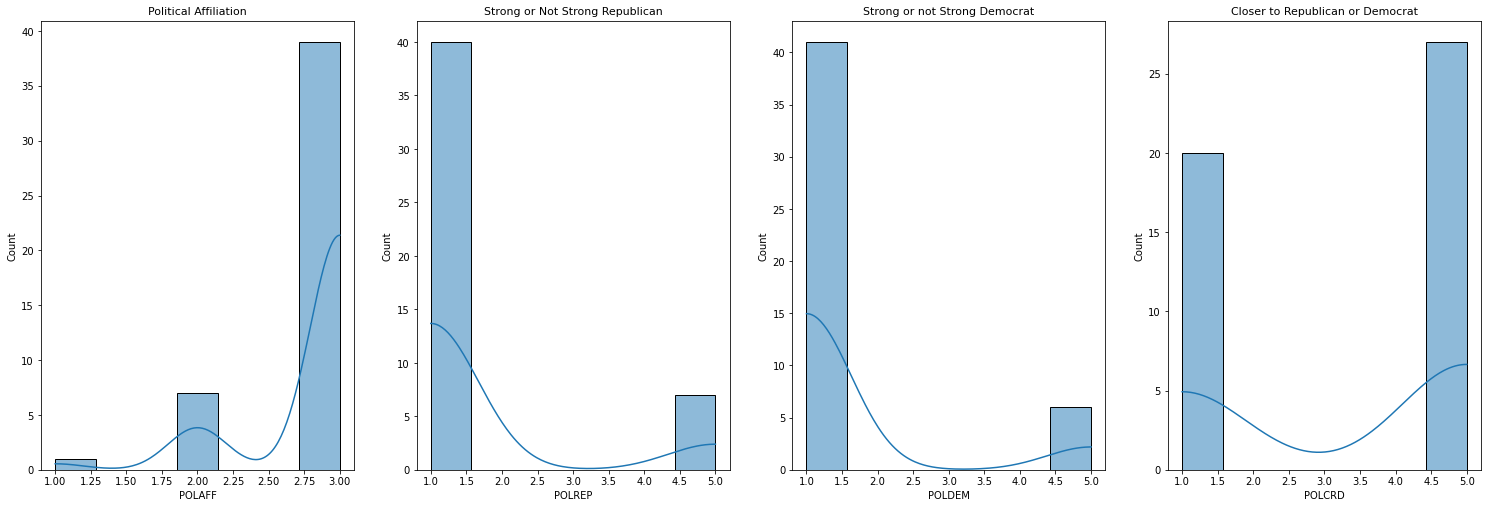

In [28]:
fig, axs = plt.subplots(1,4,figsize=(25, 8))
sns.histplot(df_political["POLAFF"], kde=True, ax=axs[0])
sns.histplot(df_political["POLREP"], kde=True, ax=axs[1])
sns.histplot(df_political["POLDEM"], kde=True, ax=axs[2])
sns.histplot(df_political["POLCRD"], kde=True, ax=axs[3])

# Plot Headers
fontsize=11
axs[0].set_title('Political Affiliation', fontsize=fontsize)
axs[1].set_title('Strong or Not Strong Republican', fontsize=fontsize)
axs[2].set_title('Strong or not Strong Democrat', fontsize=fontsize)
axs[3].set_title('Closer to Republican or Democrat', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, hspace=0.3, wspace=0.2)

plt.show()

By the histogram plot and box plot of these three indicators of consumer sentiment, there are no obvious outliers and the data is distributed in good shape, and POLREP, POLDEM and POLCRD are discrete. But there are many NULL values as well.

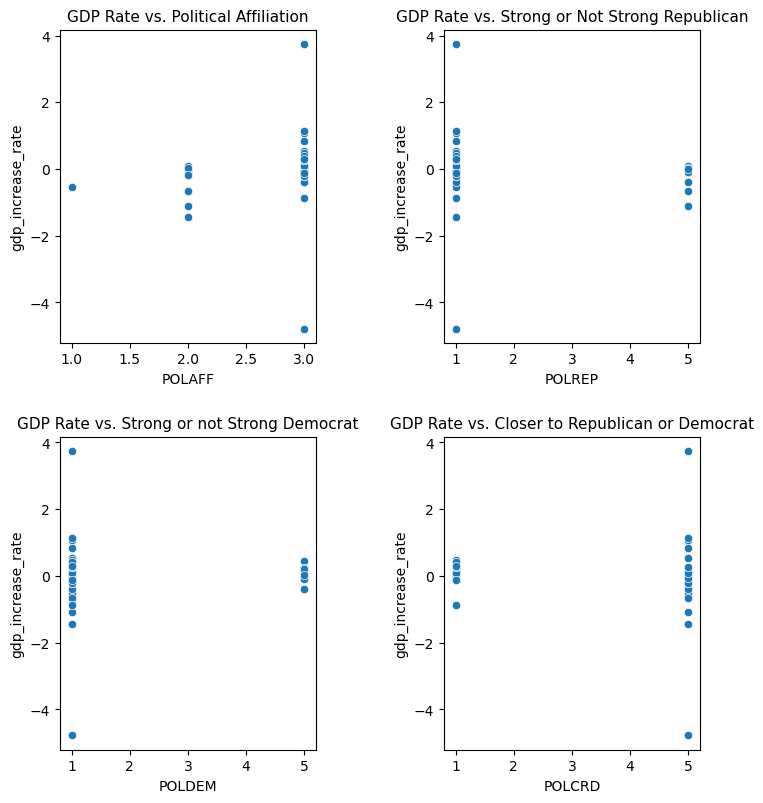

In [13]:
df_political_std = df_political.copy(deep=True)
df_political_std["gdp_increase_rate"] = stats.zscore(df_political_std["gdp_increase_rate"])
fig, axs = plt.subplots(2,2,figsize=(8, 8))
sns.scatterplot(x = df_political_std["POLAFF"], y = df_political_std['gdp_increase_rate'],ax=axs[0,0])
sns.scatterplot(x = df_political_std["POLREP"], y = df_political_std['gdp_increase_rate'],ax=axs[0,1])
sns.scatterplot(x = df_political_std["POLDEM"], y = df_political_std['gdp_increase_rate'],ax=axs[1,0])
sns.scatterplot(x = df_political_std["POLCRD"], y = df_political_std['gdp_increase_rate'],ax=axs[1,1])

fontsize=11
fig.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0.1, hspace=0.3, wspace=0.5)
axs[0,0].set_title('GDP Rate vs. Political Affiliation', fontsize=fontsize)
axs[0,1].set_title('GDP Rate vs. Strong or Not Strong Republican', fontsize=fontsize)
axs[1,0].set_title('GDP Rate vs. Strong or not Strong Democrat', fontsize=fontsize)
axs[1,1].set_title('GDP Rate vs. Closer to Republican or Democrat', fontsize=fontsize)
plt.show()

All the discrete variables have no clear correlation pattern with the response.

## Business condition
BAGO, BEXP, BUS12, BUS5, NEWS1, NEWS2, UNEMP, GOVT, RATEX


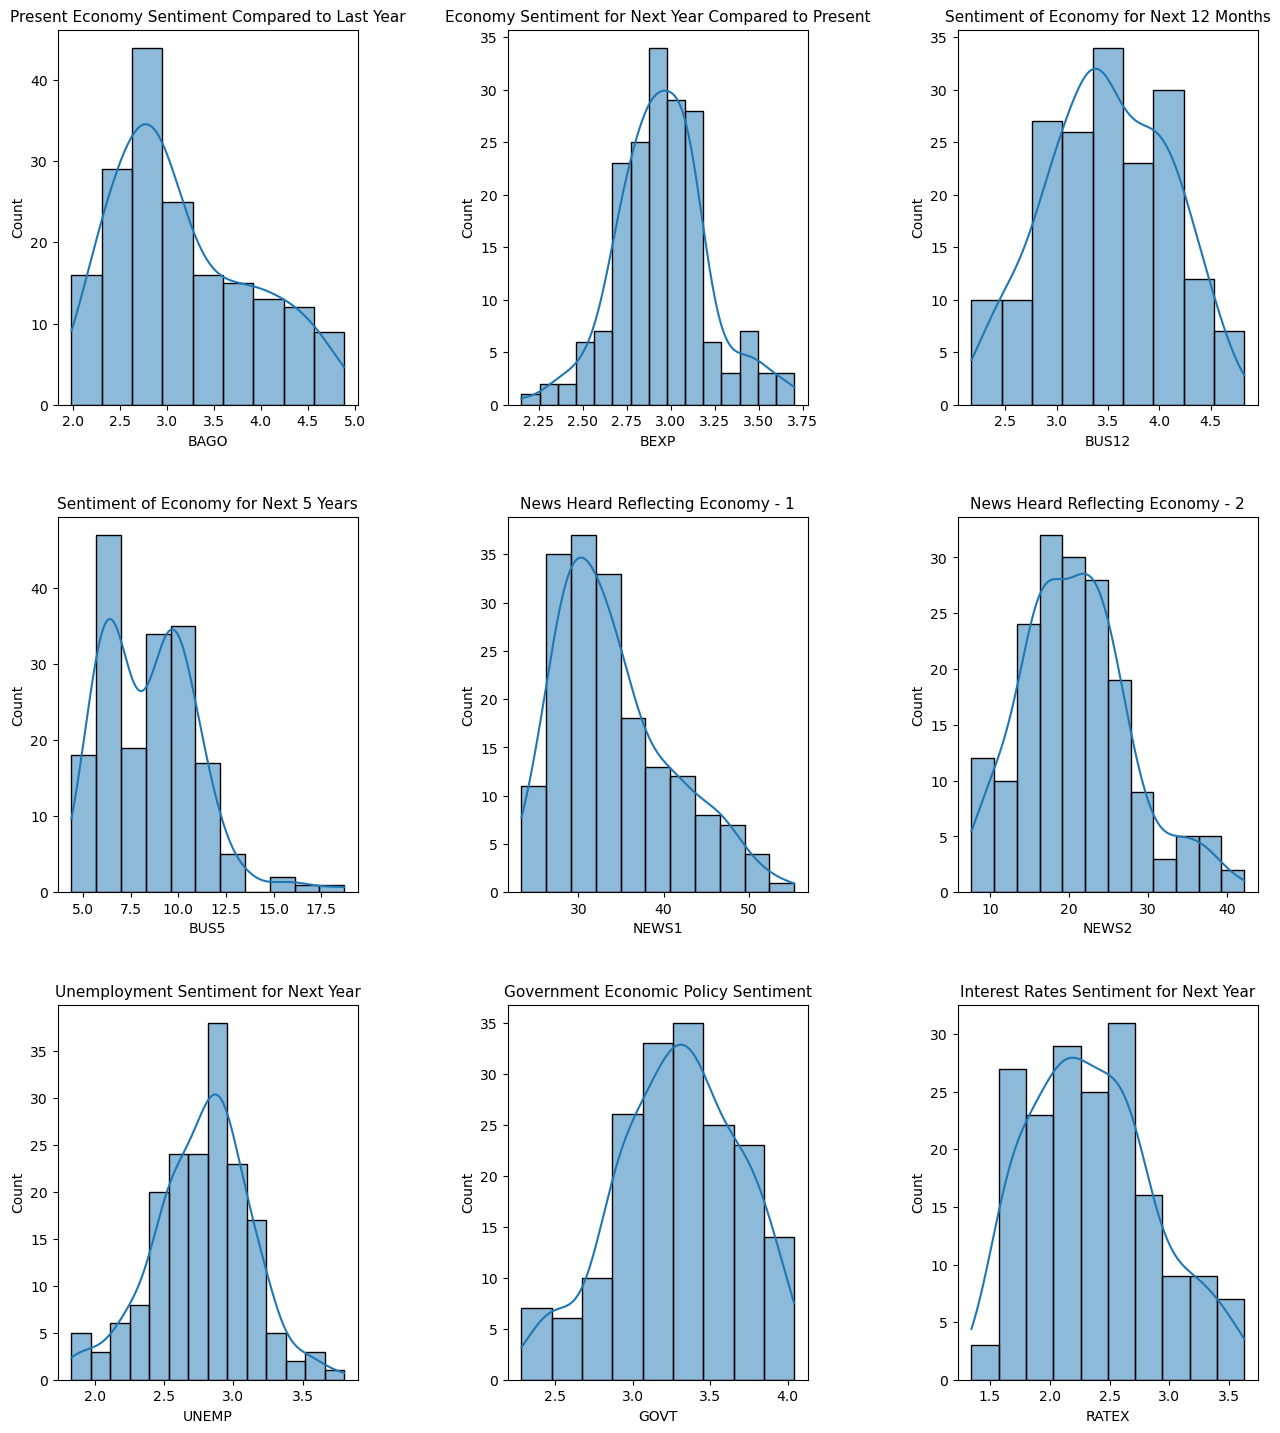

In [14]:
# business condition
business_col = ['BAGO', 'BEXP', 'BUS12', 'BUS5', 'NEWS1', 'NEWS2', 'UNEMP', 'GOVT', 'RATEX']
df_business = df[['YYYYQ', 'gdp_increase_rate'] + business_col]
# df_business = df_business[pd.notna(df_business['gdp_increase_rate'])]
df_business = df_business.dropna()
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
for i in range(len(business_col)):
    sns.histplot(df_business[business_col[i]], kde = True, ax = axs[i // 3, i % 3])
    
    
# plot headers
fontsize=11
axs[0,0].set_title('Present Economy Sentiment Compared to Last Year', fontsize=fontsize)
axs[0,1].set_title('Economy Sentiment for Next Year Compared to Present', fontsize=fontsize)
axs[0,2].set_title('Sentiment of Economy for Next 12 Months', fontsize=fontsize)
axs[1,0].set_title('Sentiment of Economy for Next 5 Years', fontsize=fontsize)
axs[1,1].set_title('News Heard Reflecting Economy - 1', fontsize=fontsize)
axs[1,2].set_title('News Heard Reflecting Economy - 2', fontsize=fontsize)
axs[2,0].set_title('Unemployment Sentiment for Next Year', fontsize=fontsize)
axs[2,1].set_title('Government Economic Policy Sentiment', fontsize=fontsize)
axs[2,2].set_title('Interest Rates Sentiment for Next Year', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0.1, hspace=0.3, wspace=0.5)
plt.show()

From the histogram plot, each indicator is distributed in good shape, with no obvious outliers.

[Text(0.5, 1.0, 'Buisness Conditions Heat Map')]

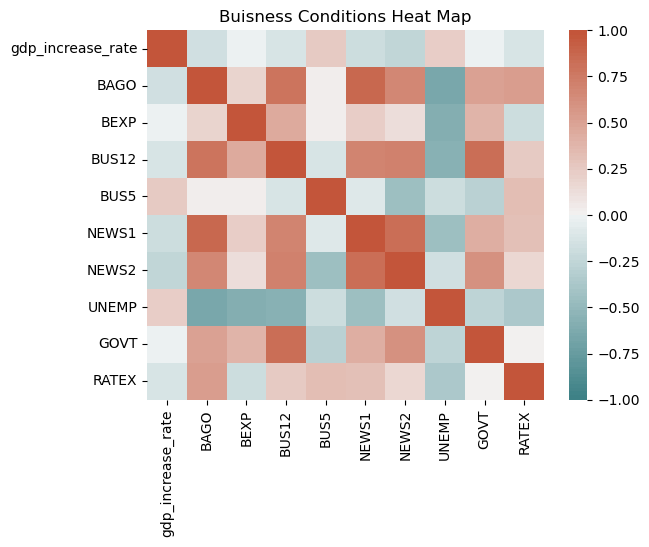

In [15]:
business_corr = df_business.iloc[:, 1:].corr()
sns.heatmap(business_corr, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(200, 20, n = 100)).set(title='Buisness Conditions Heat Map')

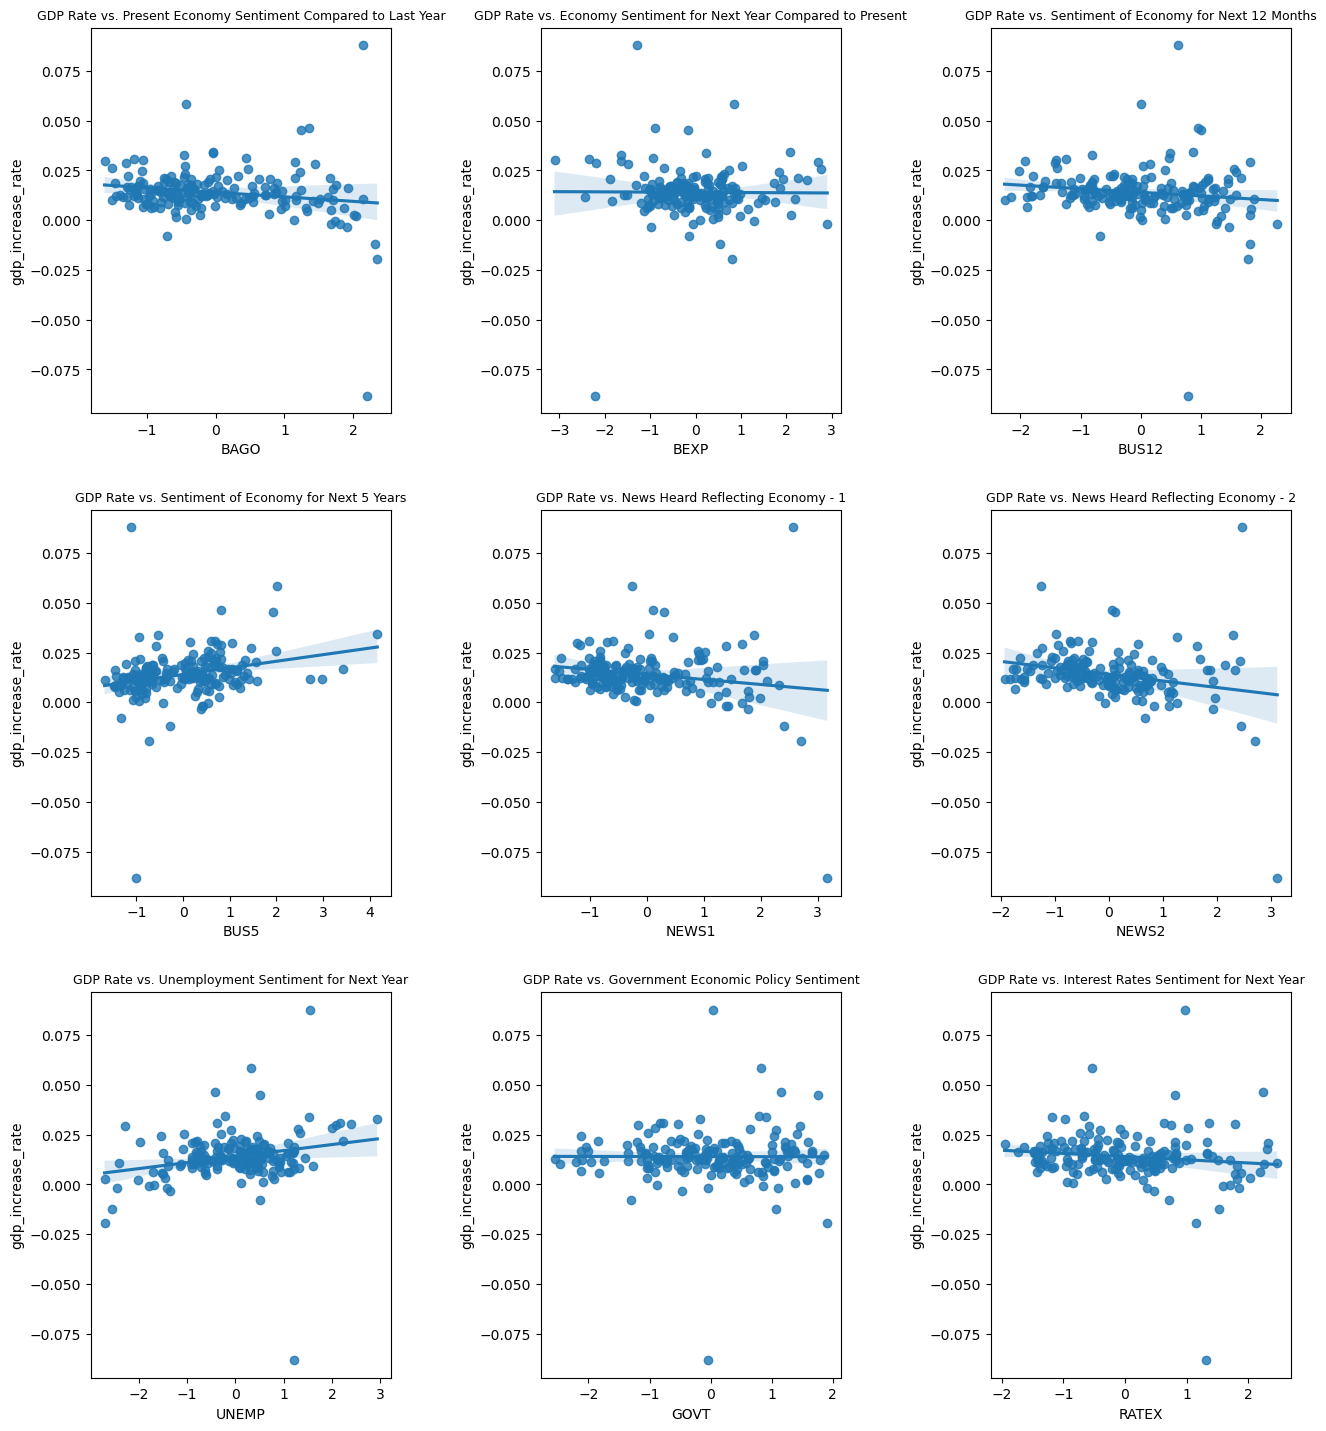

In [16]:
df_business_std = df_business.copy(deep = True)
for col in business_col:
    df_business_std[col] = stats.zscore(df_business_std[col])

fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
for i in range(len(business_col)):
    sns.regplot(x = df_business_std[business_col[i]], y = df_business_std['gdp_increase_rate'], ax = axs[i // 3, i % 3])
    
# plot header
fontsize=9
axs[0,0].set_title('GDP Rate vs. Present Economy Sentiment Compared to Last Year', fontsize=fontsize)
axs[0,1].set_title('GDP Rate vs. Economy Sentiment for Next Year Compared to Present', fontsize=fontsize)
axs[0,2].set_title('GDP Rate vs. Sentiment of Economy for Next 12 Months', fontsize=fontsize)
axs[1,0].set_title('GDP Rate vs. Sentiment of Economy for Next 5 Years', fontsize=fontsize)
axs[1,1].set_title('GDP Rate vs. News Heard Reflecting Economy - 1', fontsize=fontsize)
axs[1,2].set_title('GDP Rate vs. News Heard Reflecting Economy - 2', fontsize=fontsize)
axs[2,0].set_title('GDP Rate vs. Unemployment Sentiment for Next Year', fontsize=fontsize)
axs[2,1].set_title('GDP Rate vs. Government Economic Policy Sentiment', fontsize=fontsize)
axs[2,2].set_title('GDP Rate vs. Interest Rates Sentiment for Next Year', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0.1, hspace=0.25, wspace=0.5)
plt.show()

From the heatmap of correlation matrix and the regression plot, no indicators are strongly correlated to the GDP increase. Some slight correlated indicators: NEWS1, BUS5, UNEMP.

## Inflation Expectation
PX1Q1, PX1Q2, PX1, PX5Q1, PX5Q2, PX5


In [17]:
# inflation expectation
inflation_col = ['PX1Q1', 'PX1Q2', 'PX1', 'PX5Q1', 'PX5Q2', 'PX5']
df_inflation = df[['YYYYQ', 'gdp_increase_rate'] + inflation_col]
# df_inflation = df_inflation[pd.notna(df_inflation['gdp_increase_rate'])]
df_inflation = df_inflation.dropna()

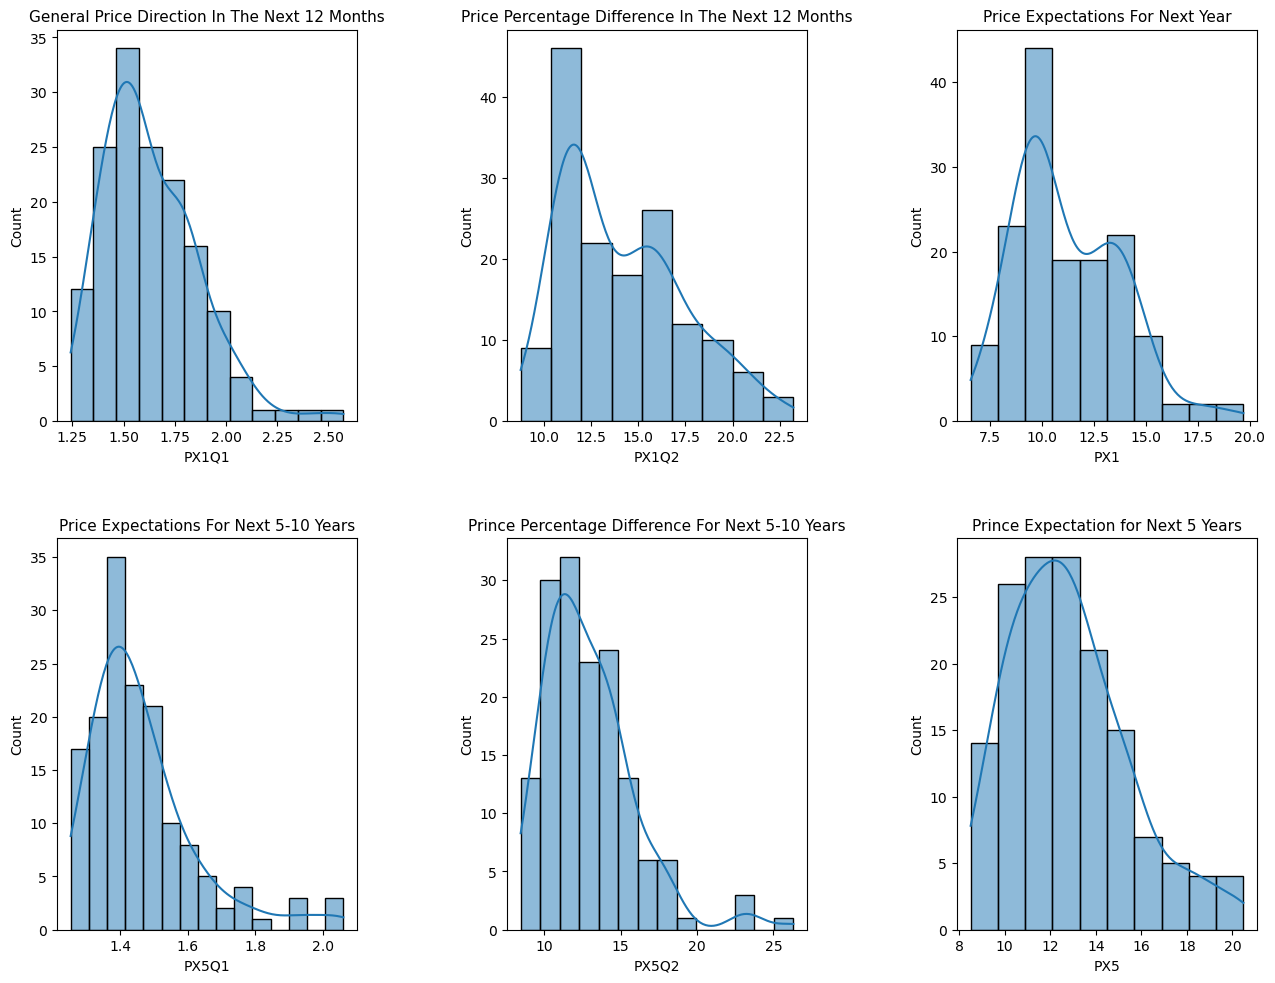

In [18]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
for i in range(len(inflation_col)):
    sns.histplot(df_inflation[inflation_col[i]], kde = True, ax = axs[i // 3, i % 3])
    
# plot headers
fontsize=11
axs[0,0].set_title('General Price Direction In The Next 12 Months', fontsize=fontsize)
axs[0,1].set_title('Price Percentage Difference In The Next 12 Months', fontsize=fontsize)
axs[0,2].set_title('Price Expectations For Next Year', fontsize=fontsize)
axs[1,0].set_title('Price Expectations For Next 5-10 Years', fontsize=fontsize)
axs[1,1].set_title('Prince Percentage Difference For Next 5-10 Years', fontsize=fontsize)
axs[1,2].set_title('Prince Expectation for Next 5 Years', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0.1, hspace=0.3, wspace=0.5)
plt.show()

From the histogram plot, each indicator is distributed in good shape, with no obvious outliers.

[Text(0.5, 1.0, 'Inflation Expectations Heat Map')]

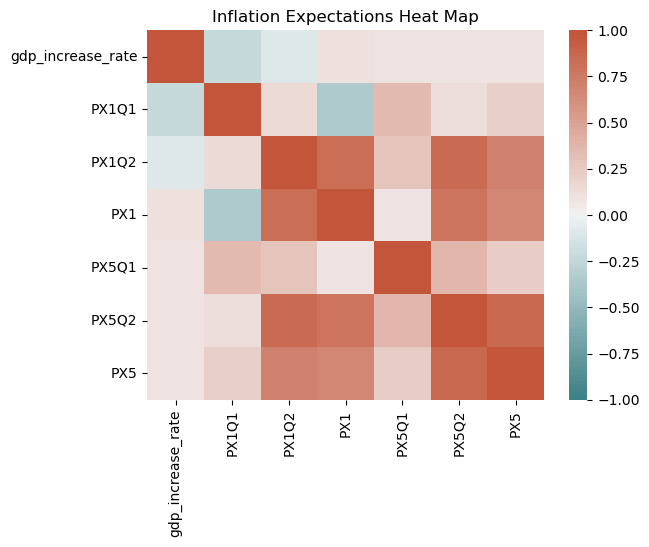

In [19]:
inflation_corr = df_inflation.iloc[:, 1:].corr()
sns.heatmap(inflation_corr, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(200, 20, n = 100)).set(title='Inflation Expectations Heat Map')

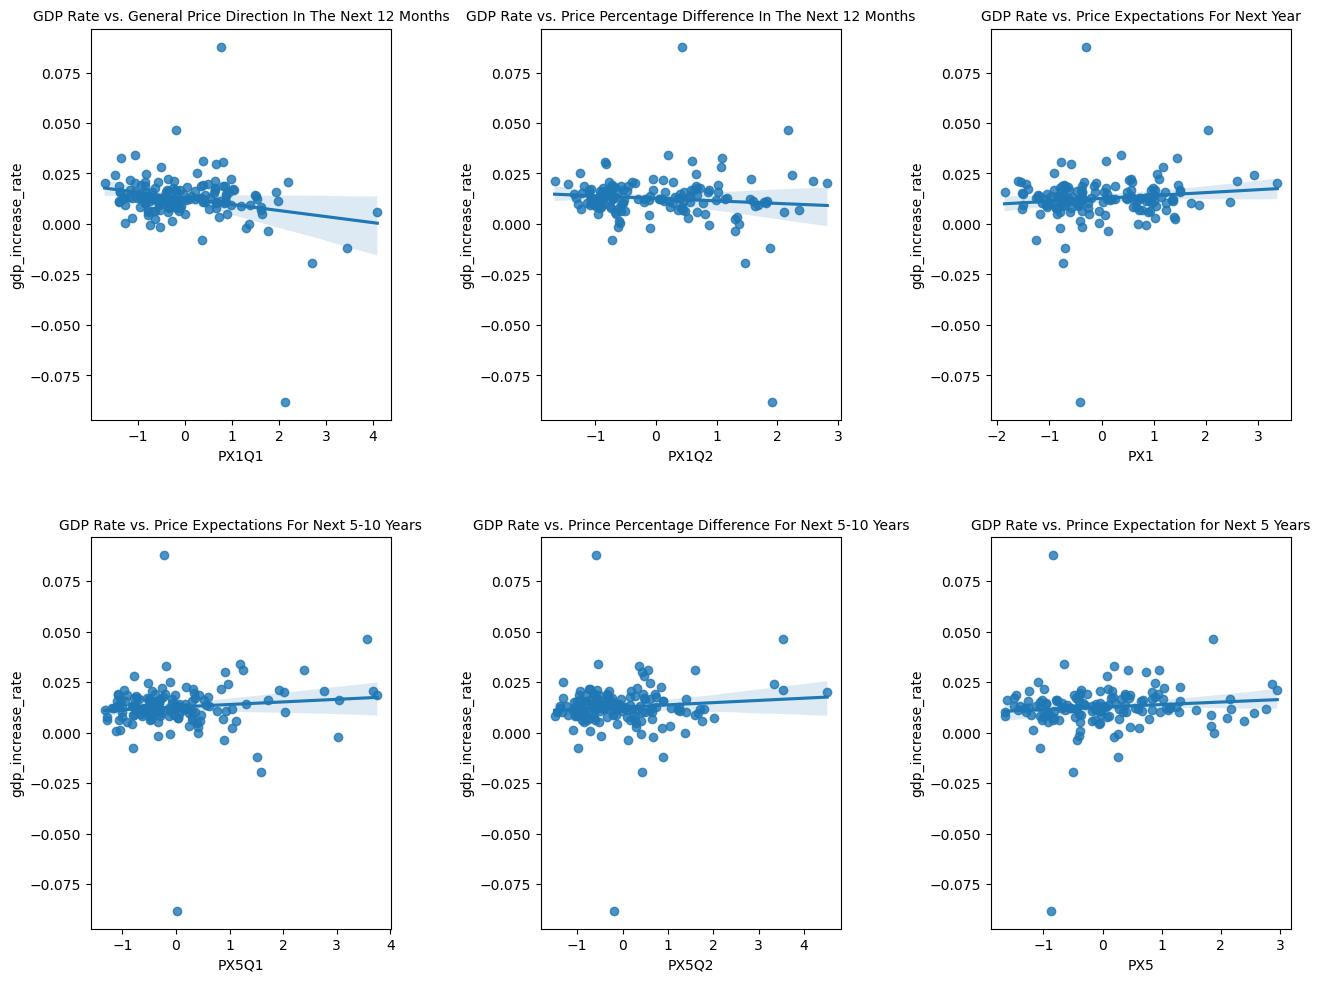

In [20]:
df_inflation_std = df_inflation.copy(deep = True)
for col in inflation_col:
    df_inflation_std[col] = stats.zscore(df_inflation_std[col])

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
for i in range(len(inflation_col)):
    sns.regplot(x = df_inflation_std[inflation_col[i]], y = df_inflation_std['gdp_increase_rate'], ax = axs[i // 3, i % 3])
    
fontsize=10
axs[0,0].set_title('GDP Rate vs. General Price Direction In The Next 12 Months', fontsize=fontsize)
axs[0,1].set_title('GDP Rate vs. Price Percentage Difference In The Next 12 Months', fontsize=fontsize)
axs[0,2].set_title('GDP Rate vs. Price Expectations For Next Year', fontsize=fontsize)
axs[1,0].set_title('GDP Rate vs. Price Expectations For Next 5-10 Years', fontsize=fontsize)
axs[1,1].set_title('GDP Rate vs. Prince Percentage Difference For Next 5-10 Years', fontsize=fontsize)
axs[1,2].set_title('GDP Rate vs. Prince Expectation for Next 5 Years', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0.1, hspace=0.3, wspace=0.5)
plt.show()

From the heatmap of correlation matrix and the regression plot, no indicators are strongly correlated to the GDP increase. Some slight correlated indicators: PX1Q1.

## Demographic
AGE, BIRTHM, BIRTHY, REGION, SEX, MARRY, NUMKID, NUMADT, EDUC, ECLGRD, EHSGRD, EGRADE


In [21]:
# demographic
demographic_col = ['AGE', 'BIRTHM', 'BIRTHY', 'REGION', 'SEX', 'MARRY', 'NUMKID', 'NUMADT', 'EDUC', 'ECLGRD', 'EHSGRD', 'EGRADE']
df_demographic = df[['YYYYQ', 'gdp_increase_rate'] + demographic_col]
df_demographic = df_demographic.dropna()

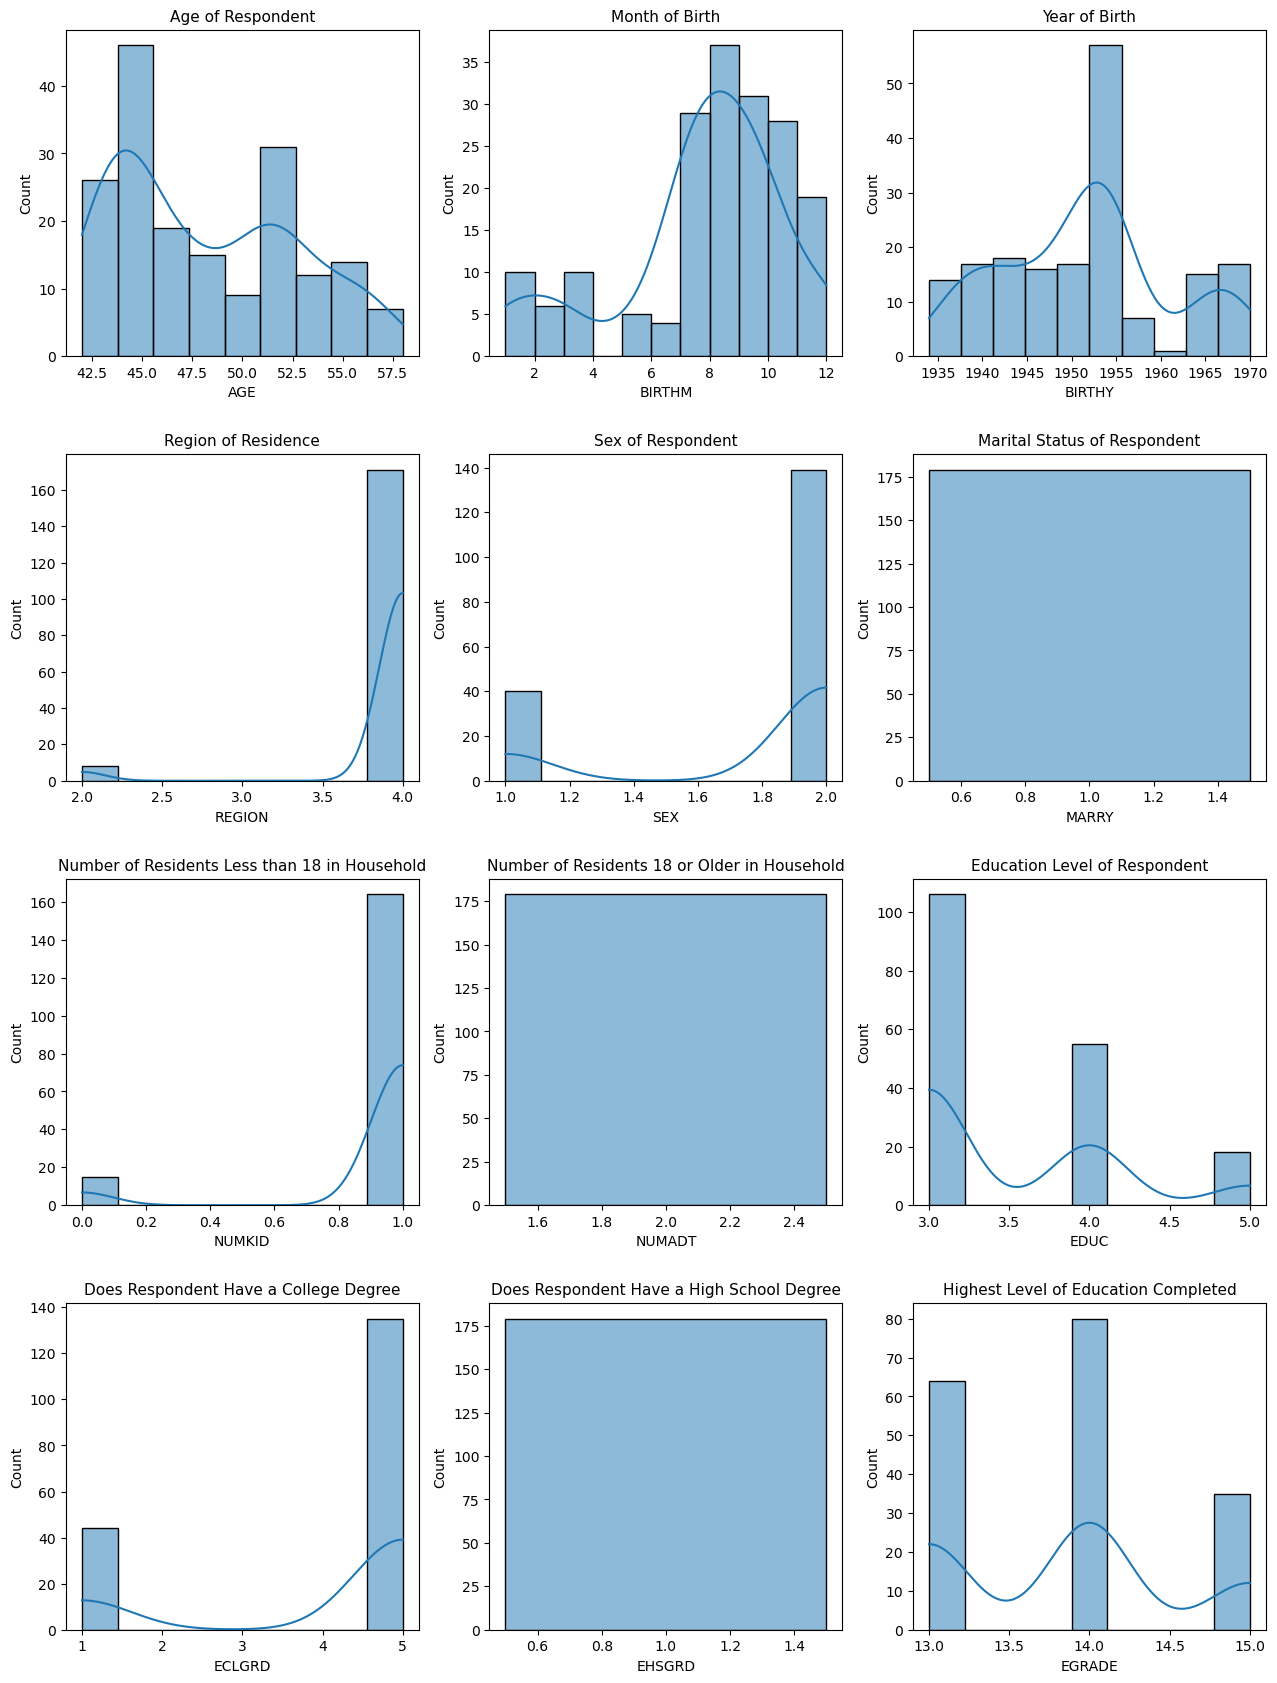

In [22]:
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 20))
for i in range(len(demographic_col)):
    sns.histplot(df_demographic[demographic_col[i]], kde = True, ax = axs[i // 3, i % 3])
    
    
#plot headers
fontsize=11
axs[0,0].set_title('Age of Respondent', fontsize=fontsize)
axs[0,1].set_title('Month of Birth', fontsize=fontsize)
#axs[0,1].tick_params(axis='x', labelsize=5)
axs[0,2].set_title('Year of Birth', fontsize=fontsize)
axs[1,0].set_title('Region of Residence', fontsize=fontsize)
axs[1,1].set_title('Sex of Respondent', fontsize=fontsize)
axs[1,2].set_title('Marital Status of Respondent', fontsize=fontsize)
axs[2,0].set_title('Number of Residents Less than 18 in Household', fontsize=fontsize)
axs[2,1].set_title('Number of Residents 18 or Older in Household', fontsize=fontsize)
axs[2,2].set_title('Education Level of Respondent', fontsize=fontsize)
axs[3,0].set_title('Does Respondent Have a College Degree', fontsize=fontsize)
axs[3,1].set_title('Does Respondent Have a High School Degree', fontsize=fontsize)
axs[3,2].set_title('Highest Level of Education Completed', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.3, wspace=0.2)
plt.show()

#if we figure out why there are weird range values, we can delete the gridspec_kw values in subplots to make each of the graphs even again.
#I needed to add it such that we could have the x-axis font of BIRTHM large enough to be legible

Most of the indicators are discrete, some have good shape of distribution (AGE, NUMKID, NUMADT, EGRADE)

[Text(0.5, 1.0, 'Respondent Demographic Heat Map')]

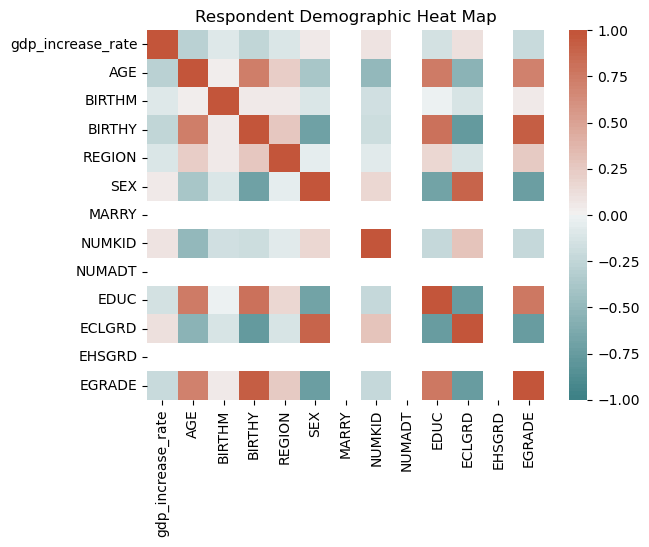

In [23]:
demographic_corr = df_demographic.iloc[:, 1:].corr()
sns.heatmap(demographic_corr, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(200, 20, n = 100)).set(title='Respondent Demographic Heat Map')

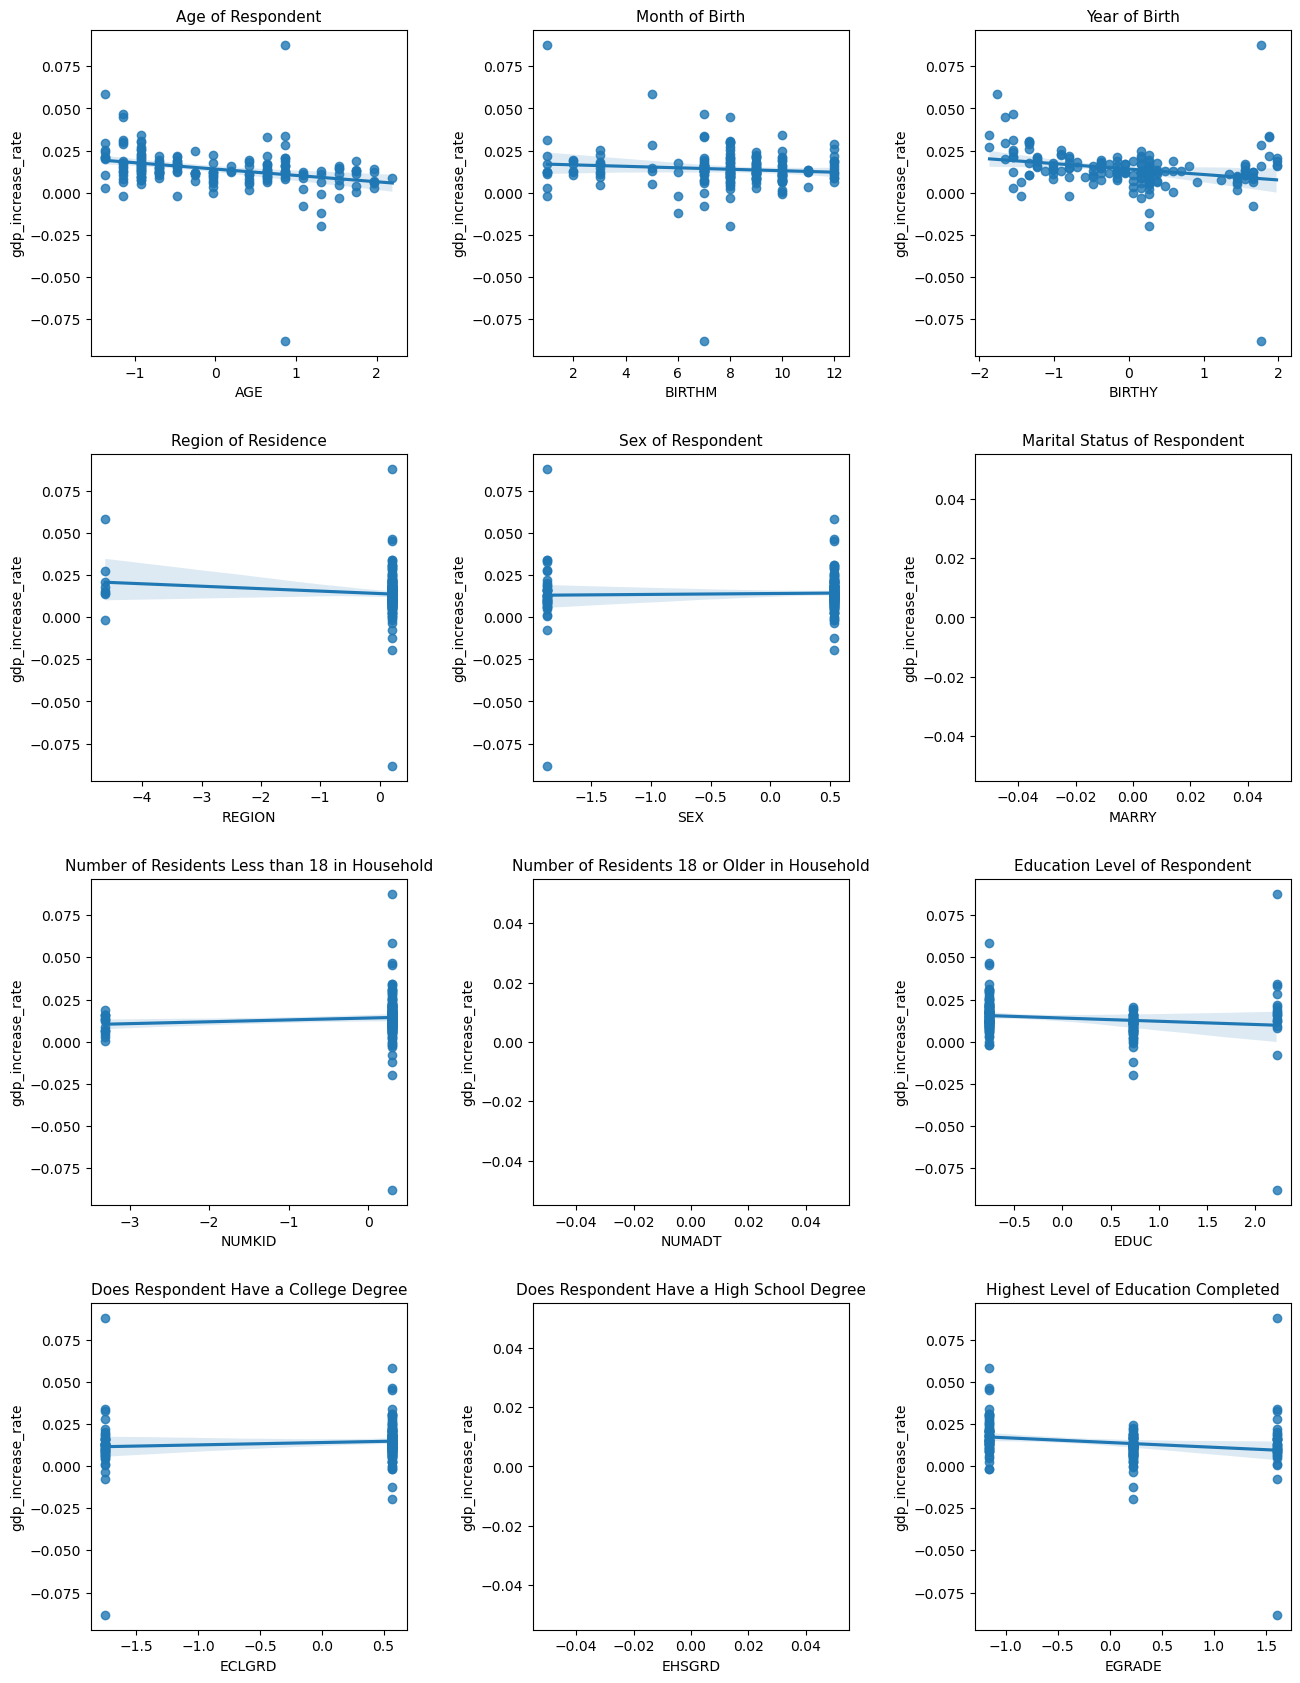

In [24]:
df_demographic_std = df_demographic.copy(deep = True)
for col in demographic_col:
    if col == 'BIRTHM':
        continue
    df_demographic_std[col] = stats.zscore(df_demographic_std[col])

fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 20))
for i in range(len(demographic_col)):
    sns.regplot(x = df_demographic_std[demographic_col[i]], y = df_demographic_std['gdp_increase_rate'], ax = axs[i // 3, i % 3])
    
# plot headers
fontsize=11
axs[0,0].set_title('Age of Respondent', fontsize=fontsize)
axs[0,1].set_title('Month of Birth', fontsize=fontsize)
#axs[0,1].tick_params(axis='x', labelsize=5)
axs[0,2].set_title('Year of Birth', fontsize=fontsize)
axs[1,0].set_title('Region of Residence', fontsize=fontsize)
axs[1,1].set_title('Sex of Respondent', fontsize=fontsize)
axs[1,2].set_title('Marital Status of Respondent', fontsize=fontsize)
axs[2,0].set_title('Number of Residents Less than 18 in Household', fontsize=fontsize)
axs[2,1].set_title('Number of Residents 18 or Older in Household', fontsize=fontsize)
axs[2,2].set_title('Education Level of Respondent', fontsize=fontsize)
axs[3,0].set_title('Does Respondent Have a College Degree', fontsize=fontsize)
axs[3,1].set_title('Does Respondent Have a High School Degree', fontsize=fontsize)
axs[3,2].set_title('Highest Level of Education Completed', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.3, wspace=0.4)
plt.show()

From the heatmap of correlation matrix and the regression plot, no indicators are strongly correlated to the GDP increase. Some slight correlated indicators: NUMKID, EGRADE

## Buying conditions
DUR, HOM, CAR

In [25]:
# Buying Conditions:
# DUR: DURABLES BUYING ATTITUDES
# HOM: HOME BUYING ATTITUDES
# CAR: VEHICLE BUYING ATTITUDES

df_buying = df[['YYYYQ','DUR','HOM','CAR','gdp_increase_rate']]
df_buying.info()
df_buying = df_buying.dropna()
df_buying = df_buying.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YYYYQ              181 non-null    int64  
 1   DUR                181 non-null    float64
 2   HOM                181 non-null    float64
 3   CAR                181 non-null    float64
 4   gdp_increase_rate  179 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.2 KB


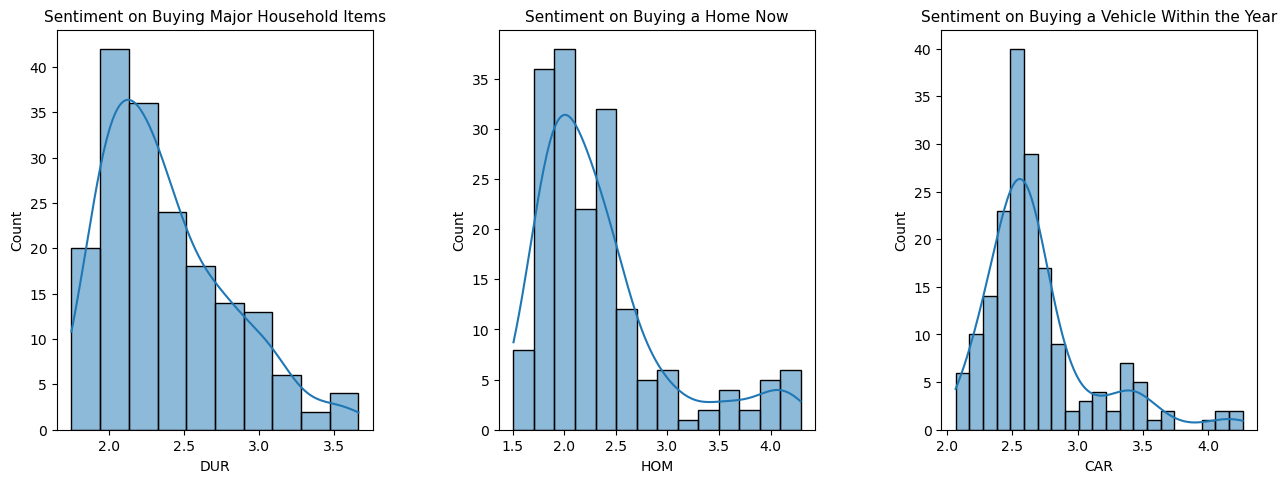

In [26]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.histplot(df_buying["DUR"], kde=True, ax=axs[0])
sns.histplot(df_buying["HOM"], kde=True, ax=axs[1])
sns.histplot(df_buying["CAR"], kde=True, ax=axs[2])

# plot headers
fontsize=11
axs[0].set_title('Sentiment on Buying Major Household Items', fontsize=fontsize)
axs[1].set_title('Sentiment on Buying a Home Now', fontsize=fontsize)
axs[2].set_title('Sentiment on Buying a Vehicle Within the Year', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.3, wspace=0.4)
plt.show()

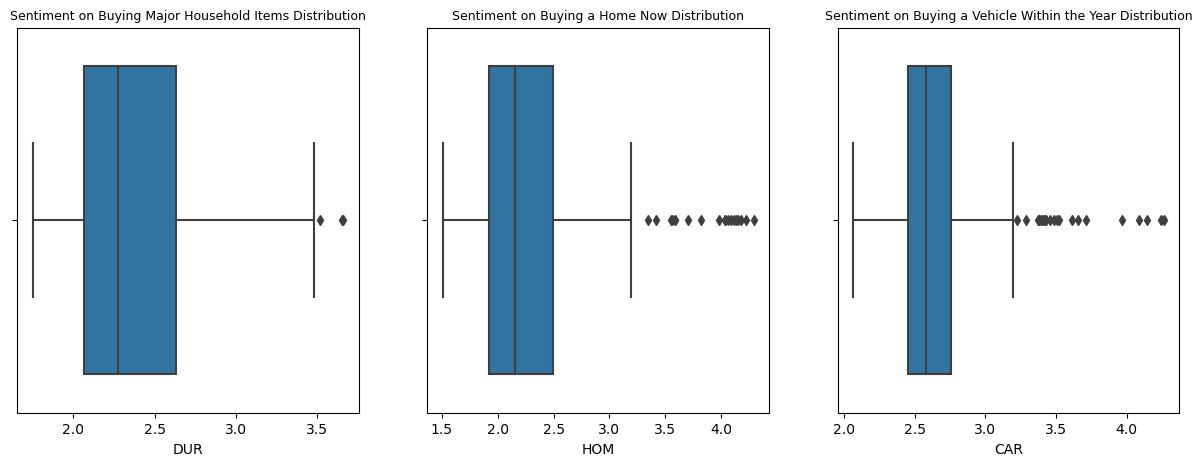

In [27]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.boxplot(x = df_buying["DUR"], ax=axs[0])
sns.boxplot(x = df_buying["HOM"], ax=axs[1])
sns.boxplot(x = df_buying["CAR"], ax=axs[2])

# plot headers
fontsize=9
axs[0].set_title('Sentiment on Buying Major Household Items Distribution', fontsize=fontsize)
axs[1].set_title('Sentiment on Buying a Home Now Distribution', fontsize=fontsize)
axs[2].set_title('Sentiment on Buying a Vehicle Within the Year Distribution', fontsize=fontsize)
plt.show()

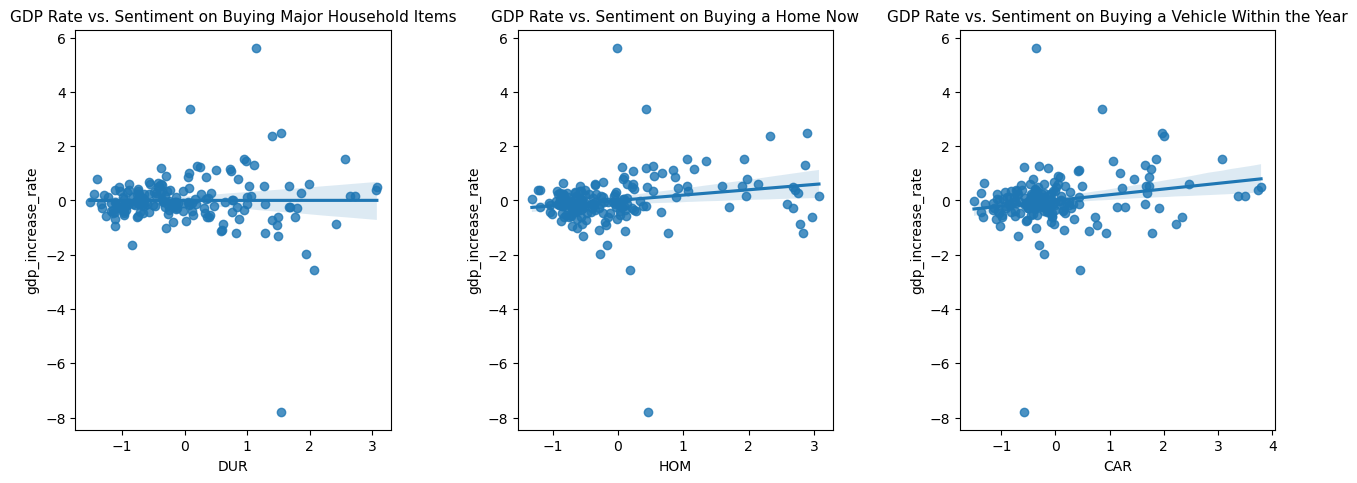

In [28]:
df_buying_std = df_buying.copy(deep=True)
df_buying_std["DUR"] = stats.zscore(df_buying["DUR"])
df_buying_std["HOM"] = stats.zscore(df_buying["HOM"])
df_buying_std["CAR"] = stats.zscore(df_buying["CAR"])
df_buying_std["gdp_increase_rate"] = stats.zscore(df_buying["gdp_increase_rate"])
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.regplot(x = df_buying_std["DUR"], y = df_buying_std['gdp_increase_rate'],ax=axs[0])
sns.regplot(x = df_buying_std["HOM"], y = df_buying_std['gdp_increase_rate'],ax=axs[1])
sns.regplot(x = df_buying_std["CAR"], y = df_buying_std['gdp_increase_rate'],ax=axs[2])

# plot headers
fontsize=11
axs[0].set_title('GDP Rate vs. Sentiment on Buying Major Household Items', fontsize=fontsize)
axs[1].set_title('GDP Rate vs. Sentiment on Buying a Home Now', fontsize=fontsize)
axs[2].set_title('GDP Rate vs. Sentiment on Buying a Vehicle Within the Year', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.3, wspace=0.4)
plt.show()

By EDA above, HOM and CAR tend to have relation with response.

## Income Demographics
INCOME

In [29]:
# Income Demographics:
# INCOME:TOTAL HOUSEHOLD INCOME - CURRENT DOLLARS
df_income = df[['YYYYQ','INCOME','gdp_increase_rate']]
df_income.info()
df_income = df_income.dropna()
df_income = df_income.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YYYYQ              181 non-null    int64  
 1   INCOME             181 non-null    float64
 2   gdp_increase_rate  179 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.4 KB


[Text(0.5, 1.0, 'Total Household Income of Previous Year')]

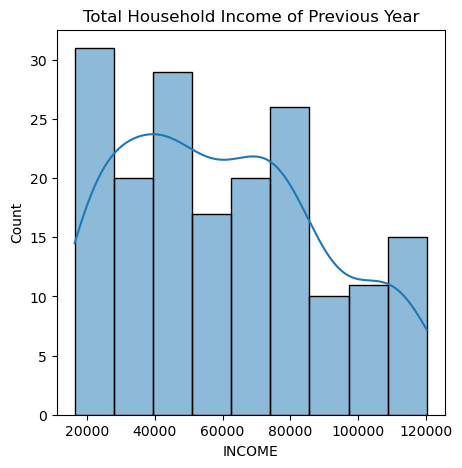

In [30]:
fig, axs = plt.subplots(ncols=1, figsize=(5, 5))
sns.histplot(df_income["INCOME"], kde=True).set(title='Total Household Income of Previous Year')

[Text(0.5, 1.0, 'Total Household Income of Previous Year Distribution')]

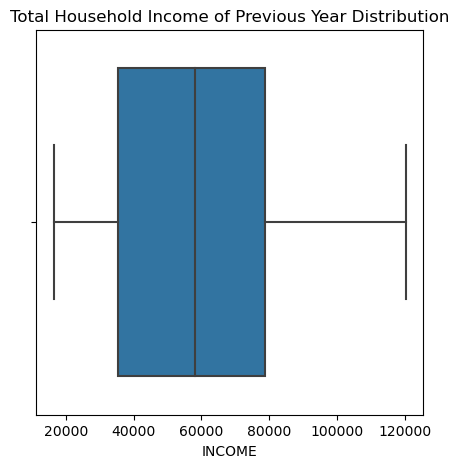

In [31]:
fig, axs = plt.subplots(ncols=1, figsize=(5, 5))
sns.boxplot(x = df_income["INCOME"]).set(title='Total Household Income of Previous Year Distribution')

[Text(0.5, 1.0, 'GDP Rate vs. Total Household Income of Previous Year')]

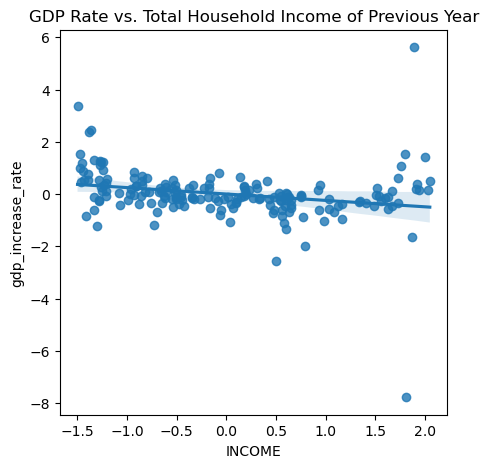

In [32]:
df_income_std = df_income.copy(deep=True)
df_income_std["INCOME"] = stats.zscore(df_income_std["INCOME"])
df_income_std["gdp_increase_rate"] = stats.zscore(df_income_std["gdp_increase_rate"])
fig, axs = plt.subplots(ncols=1, figsize=(5, 5))
sns.regplot(x = df_income_std["INCOME"], y = df_income_std['gdp_increase_rate']).set(title='GDP Rate vs. Total Household Income of Previous Year')

By EDA above, INCOME could be included in the model, since it has relation with response.

## Wealth Demographics
HOMEAMT, INVAMT

In [33]:
# Wealth Demographics:
# HOMEAMT: MARKET VALUE OF HOME
# INVAMT: INVESTMENT VALUE

df_wealth = df[['YYYYQ','HOMEAMT','INVAMT','gdp_increase_rate']]
df_wealth.info()
df_wealth = df_wealth.dropna()
df_wealth = df_wealth.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YYYYQ              181 non-null    int64  
 1   HOMEAMT            86 non-null     float64
 2   INVAMT             104 non-null    float64
 3   gdp_increase_rate  179 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 5.8 KB


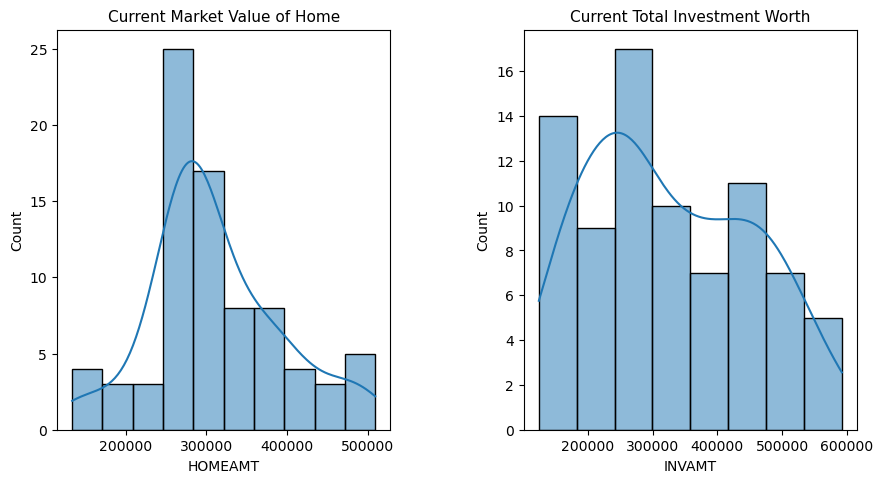

In [34]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sns.histplot(df_wealth["HOMEAMT"], kde=True, ax=axs[0])
sns.histplot(df_wealth["INVAMT"], kde=True, ax=axs[1])

# plot headers
fontsize=11
axs[0].set_title('Current Market Value of Home', fontsize=fontsize)
axs[1].set_title('Current Total Investment Worth', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.3, wspace=0.4)
plt.show()

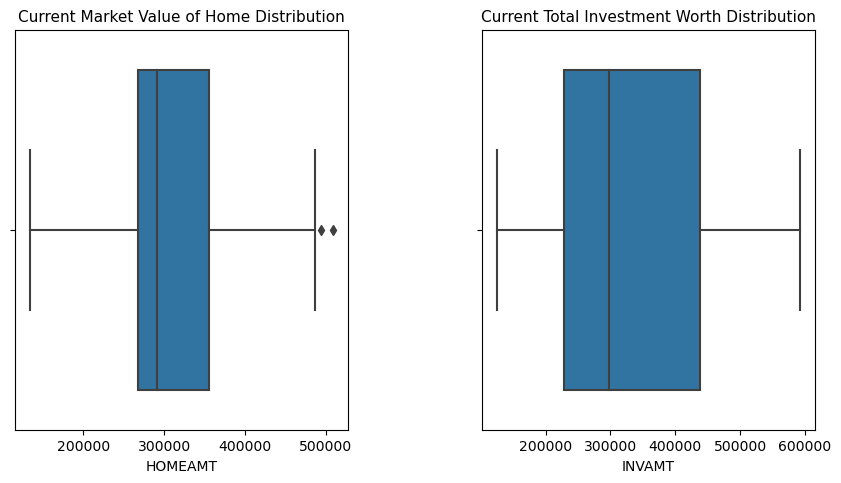

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sns.boxplot(x = df_wealth["HOMEAMT"], ax=axs[0])
sns.boxplot(x = df_wealth["INVAMT"], ax=axs[1])

# plot headers
fontsize=11
axs[0].set_title('Current Market Value of Home Distribution', fontsize=fontsize)
axs[1].set_title('Current Total Investment Worth Distribution', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.3, wspace=0.4)
plt.show()

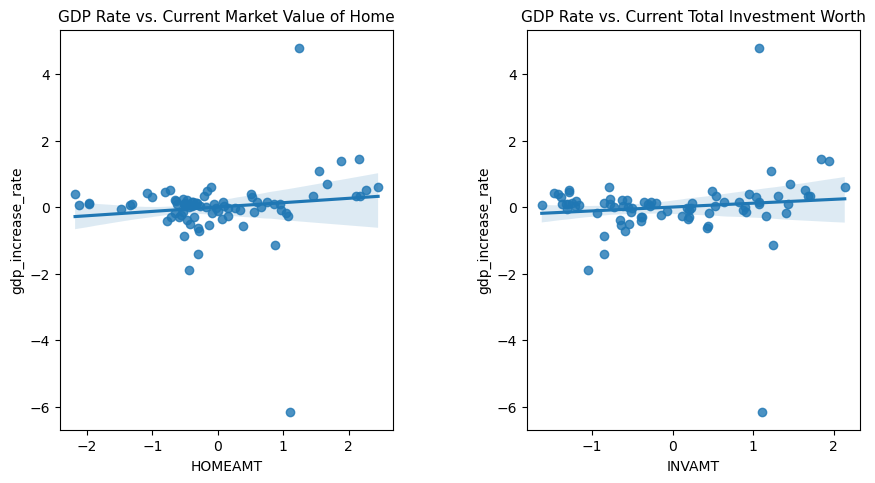

In [36]:
df_wealth_std = df_wealth.copy(deep=True)
df_wealth_std["HOMEAMT"] = stats.zscore(df_wealth["HOMEAMT"])
df_wealth_std["INVAMT"] = stats.zscore(df_wealth["INVAMT"])
df_wealth_std["gdp_increase_rate"] = stats.zscore(df_wealth["gdp_increase_rate"])
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sns.regplot(x = df_wealth_std["HOMEAMT"], y = df_wealth_std['gdp_increase_rate'],ax=axs[0])
sns.regplot(x = df_wealth_std["INVAMT"], y = df_wealth_std['gdp_increase_rate'],ax=axs[1])

#plot headers
fontsize=11
axs[0].set_title('GDP Rate vs. Current Market Value of Home', fontsize=fontsize)
axs[1].set_title('GDP Rate vs. Current Total Investment Worth', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.3, wspace=0.4)
plt.show()

There is no clear pattern between HOMEAMT, INVAMT and the response GDP increase.

## Vehicle
VEHNUM

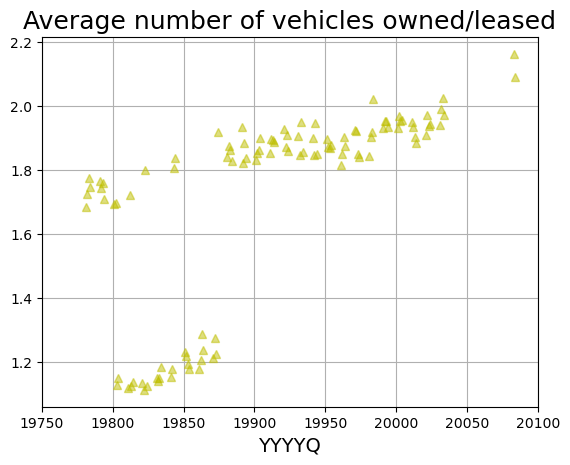

In [37]:
df2=df.loc[(df['VEHNUM']>0)]
plt.title('Average number of vehicles owned/leased',fontsize=18)
plt.xlabel('YYYYQ',fontsize=14)
plt.plot(df2['YYYYQ'],df2['VEHNUM'],'y^',alpha = 0.5)
locs, labs = plt.xticks()
plt.grid(True)
plt.xticks(locs)
plt.show()

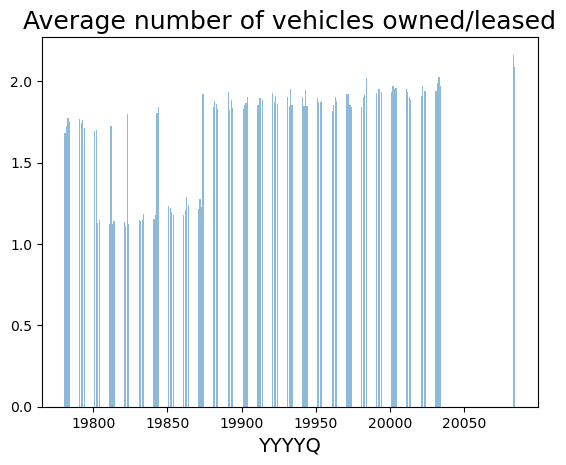

In [38]:
plt.title('Average number of vehicles owned/leased',fontsize=18)
plt.xlabel('YYYYQ',fontsize=14)
plt.bar(df2['YYYYQ'],df2['VEHNUM'],alpha = 0.5)
# plt.savefig('Bar_Average number of vehicles owned or leased.png')
plt.show()

[Text(0.5, 1.0, 'Probabilities And GDP Heat Map')]

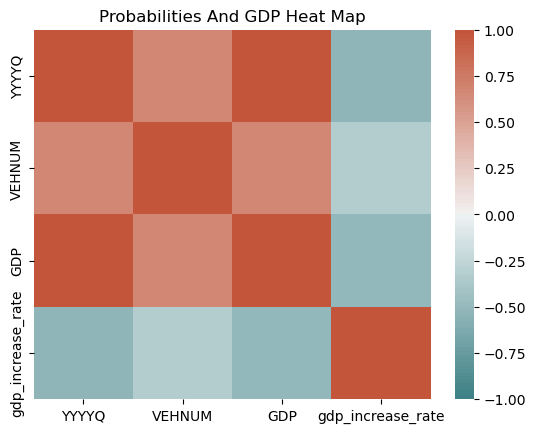

In [39]:
df2 = df2[['YYYYQ','VEHNUM','GDP', 'gdp_increase_rate']]
corr = pd.DataFrame(df2).corr()
sns.heatmap(corr,vmin=-1,vmax=1,center=0,
           cmap=sns.diverging_palette(200,20,n=100)).set(title='Probabilities And GDP Heat Map')
#plt.savefig('ProbabilitiesAndGDP_HeatMap.png')

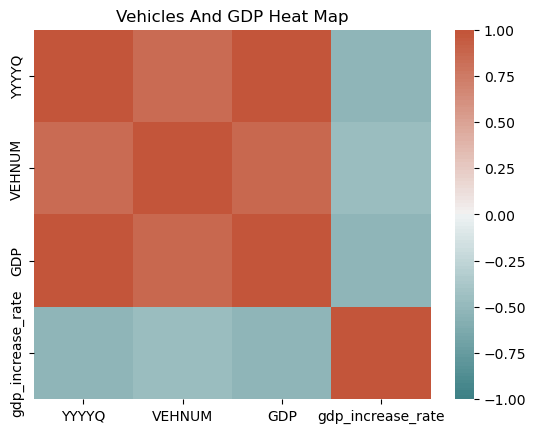

In [40]:
dfH = df2.loc[(df2['VEHNUM']>1.5)]
corr = pd.DataFrame(dfH).corr()
sns.heatmap(corr,vmin=-1,vmax=1,center=0,
           cmap=sns.diverging_palette(200,20,n=100)).set(title='Vehicles And GDP Heat Map')
plt.show()
# plt.savefig('VehiclesAndGDP_HeatMap.png')

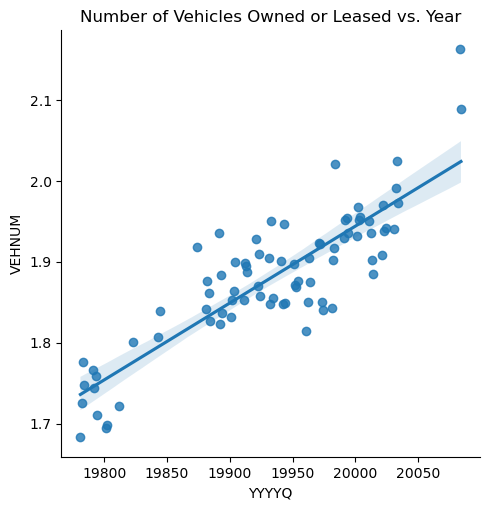

In [41]:
sns.lmplot(x='YYYYQ',y='VEHNUM',data=dfH).set(title='Number of Vehicles Owned or Leased vs. Year')

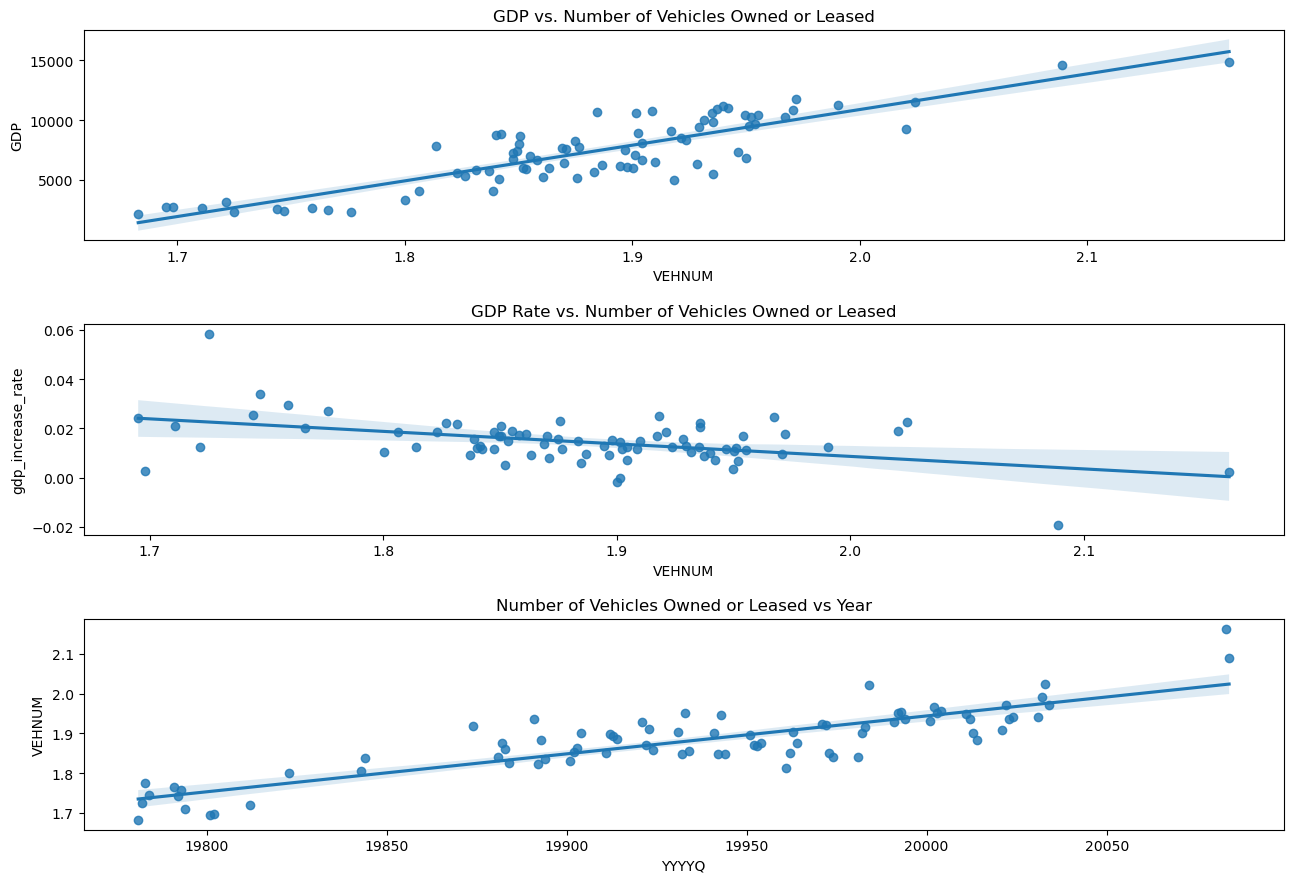

In [42]:
fig, axs = plt.subplots(3,1,figsize=(15, 10))
sns.regplot(y=dfH['GDP'],x=dfH['VEHNUM'],ax=axs[0]).set(title='GDP vs. Number of Vehicles Owned or Leased')
sns.regplot(y=dfH['gdp_increase_rate'],x=dfH['VEHNUM'],ax=axs[1]).set(title='GDP Rate vs. Number of Vehicles Owned or Leased')
sns.regplot(x=dfH['YYYYQ'],y=dfH['VEHNUM'],ax=axs[2]).set(title='Number of Vehicles Owned or Leased vs Year')
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4, wspace=0.5)
plt.show()
# plt.savefig('Number of vehicles owned or leased with GDP.png')

From the above analysis, VEHNUM has correlation with the response and could be included in the model.

## Probabilities
PINC, PINC2, PJOB, PSSA, PCRY, PSTK

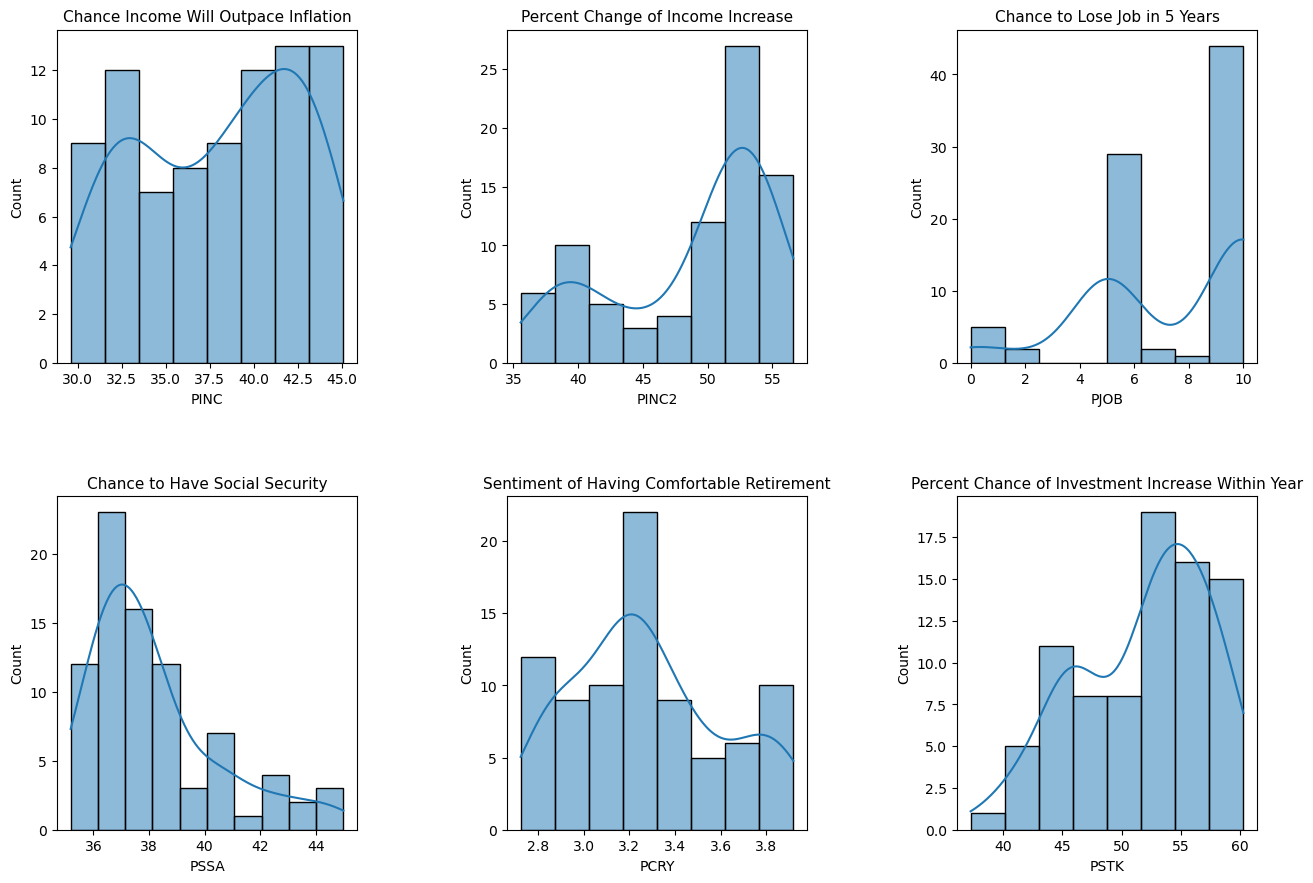

In [43]:
p1 = df[['YYYYQ', 'PINC', 'PINC2', 'PJOB', 'PSSA', 'PCRY', 'PSTK','gdp_increase_rate']]
p1 = p1.dropna()
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(15, 10))
PCN = ['PINC', 'PINC2','PJOB', 'PSSA', 'PCRY', 'PSTK']
for i in range(6):
     sns.histplot(p1[PCN[i]], kde=True, ax=axs[i//3,i%3])

# plot headers
fontsize=11
axs[0,0].set_title('Chance Income Will Outpace Inflation', fontsize=fontsize)
axs[0,1].set_title('Percent Change of Income Increase', fontsize=fontsize)
axs[0,2].set_title('Chance to Lose Job in 5 Years', fontsize=fontsize)
axs[1,0].set_title('Chance to Have Social Security', fontsize=fontsize)
axs[1,1].set_title('Sentiment of Having Comfortable Retirement', fontsize=fontsize)
axs[1,2].set_title('Percent Chance of Investment Increase Within Year', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4, wspace=0.5)
plt.show()


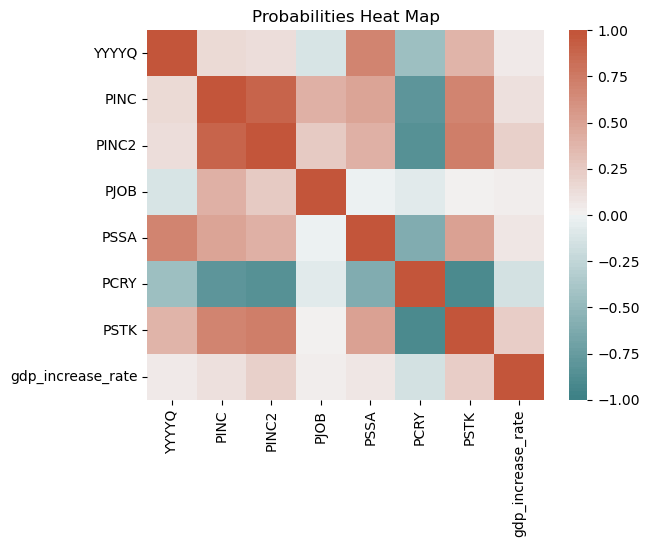

In [44]:
corr = pd.DataFrame(p1).corr()
sns.heatmap(corr,vmin=-1,vmax=1,center=0,
           cmap=sns.diverging_palette(200,20,n=100)).set(title='Probabilities Heat Map')
plt.show()
# plt.savefig('ProbabilitiesHeatMap.png')

From the above EDA analysis, some significant variables include PSSA and PCRY.

## Gas
GASPX2, GAS1, GAS1PX2, GAS5, GASPX1, GAS1PX1



In [45]:
E = df[['YYYYQ', 'GASPX2','GAS1','GAS1PX2','GAS5','GASPX1','GAS1PX1', 'gdp_increase_rate']]

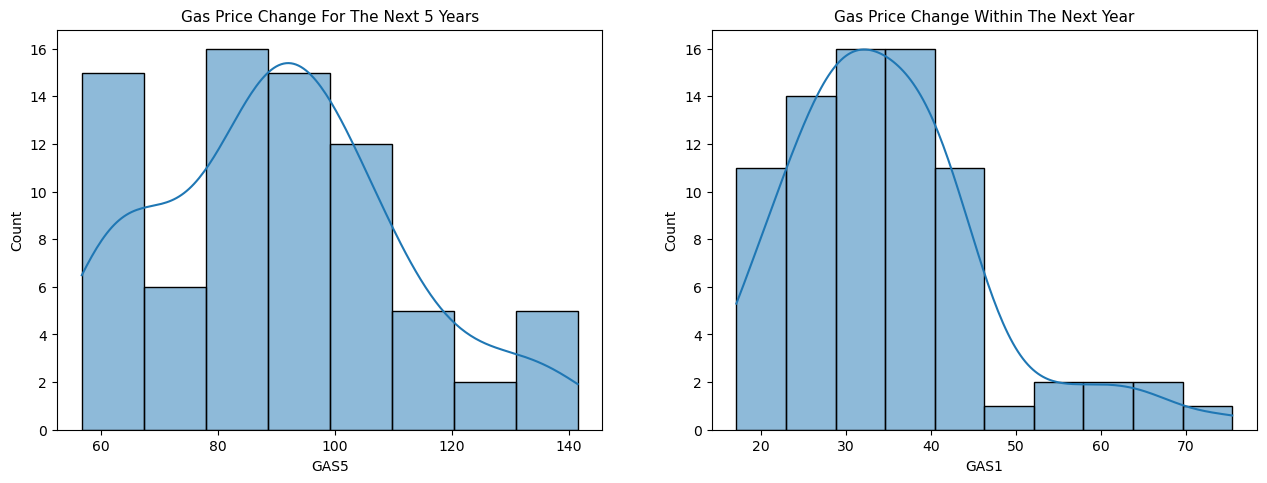

In [46]:
E1 = E.loc[(E['GAS5']<=500) &(E['GAS5']>=-250) & (E['GAS1']<=250)&(E['GAS1']>=-250)]
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.histplot(E1['GAS5'], kde=True, ax=axs[0])
sns.histplot(E1['GAS1'], kde=True, ax=axs[1])

# plot headers
fontsize=11
axs[0].set_title('Gas Price Change For The Next 5 Years', fontsize=fontsize)
axs[1].set_title('Gas Price Change Within The Next Year', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4, wspace=0.2)
plt.show()

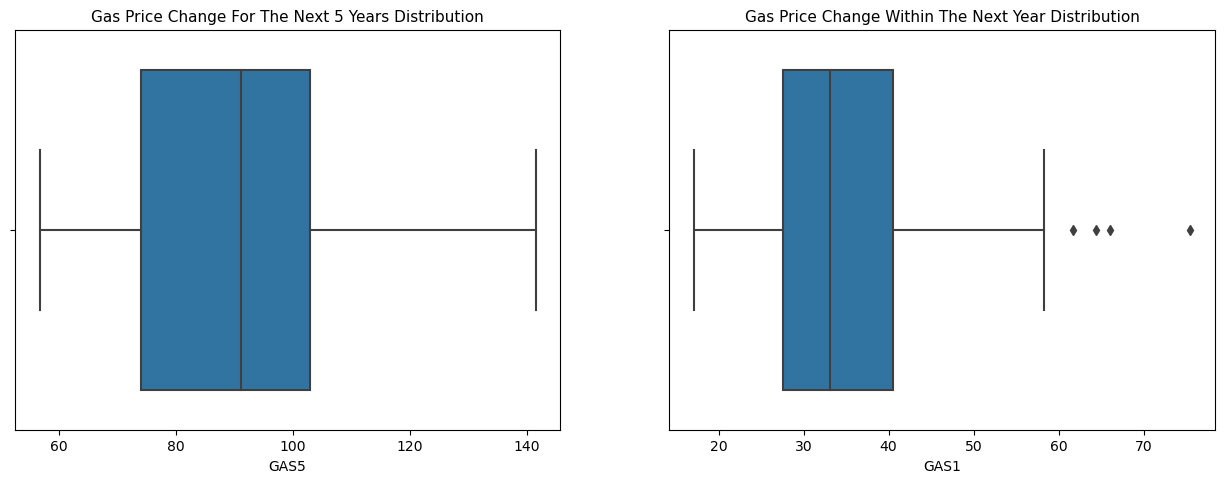

In [47]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(x = E1["GAS5"], ax=axs[0])
sns.boxplot(x = E1["GAS1"], ax=axs[1])

# plot headers
fontsize=11
axs[0].set_title('Gas Price Change For The Next 5 Years Distribution', fontsize=fontsize)
axs[1].set_title('Gas Price Change Within The Next Year Distribution', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4, wspace=0.2)
plt.show()

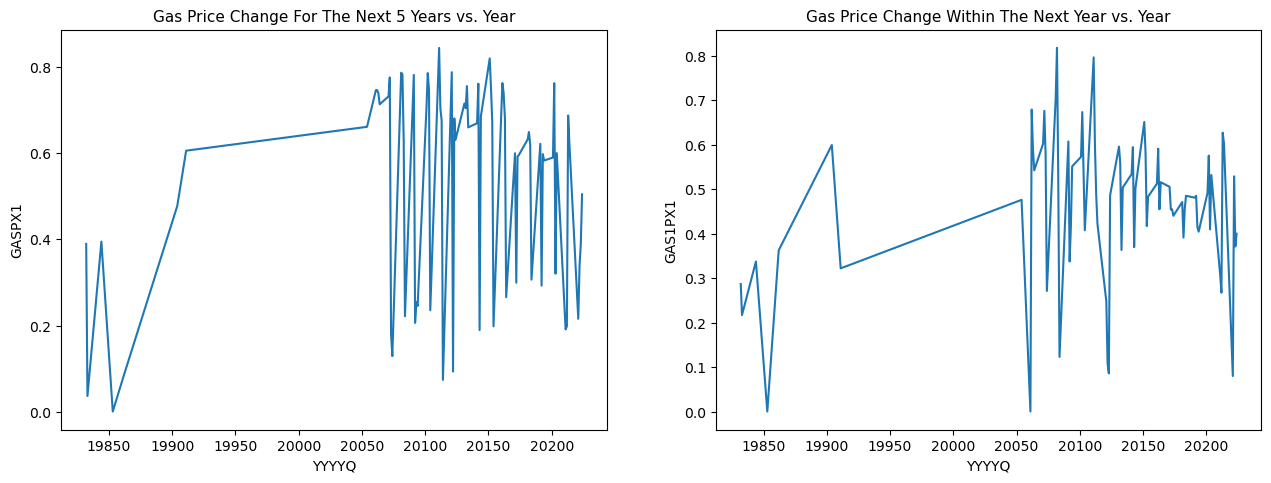

In [48]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.lineplot(x = E1['YYYYQ'],y = E1['GASPX1'], ax=axs[0])
sns.lineplot(x = E1['YYYYQ'],y = E1['GAS1PX1'], ax=axs[1])

# plot headers
fontsize=11
axs[0].set_title('Gas Price Change For The Next 5 Years vs. Year', fontsize=fontsize)
axs[1].set_title('Gas Price Change Within The Next Year vs. Year', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4, wspace=0.2)
plt.show()

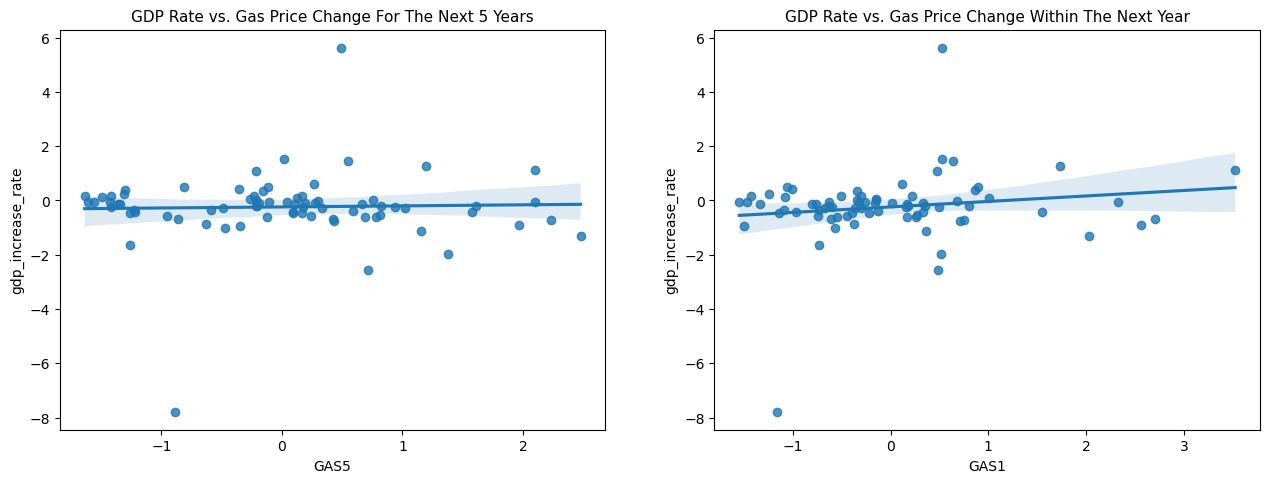

In [49]:
dfgdp = df[['YYYYQ','gdp_increase_rate']].dropna()
dfgdp = dfgdp.reset_index(drop=True)
df_consumer_std = E1.copy(deep=True)
df_consumer_std["GAS5"] = stats.zscore(E1["GAS5"])
df_consumer_std["GAS1"] = stats.zscore(E1["GAS1"])
df_consumer_std["gdp_increase_rate"] = stats.zscore(dfgdp["gdp_increase_rate"])
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.regplot(x = df_consumer_std["GAS5"], y = df_consumer_std['gdp_increase_rate'], ax=axs[0])
sns.regplot(x = df_consumer_std["GAS1"], y = df_consumer_std['gdp_increase_rate'],ax=axs[1])


#plot headers
fontsize=11
axs[0].set_title('GDP Rate vs. Gas Price Change For The Next 5 Years', fontsize=fontsize)
axs[1].set_title('GDP Rate vs. Gas Price Change Within The Next Year', fontsize=fontsize)
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4, wspace=0.2)
plt.show()

#df_consumer_std["gdp_increase_rate"]

From EDA above, GAS1 could be added to the model.